# Importing Libraries

In [9]:
#importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split

In [10]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Insurance Dataset.csv to Insurance Dataset (1).csv


# Adding Data File

In [12]:
import pandas as pd
import io
  
datasheet = pd.read_csv(io.BytesIO(uploaded['Insurance Dataset.csv']))
print(datasheet)

          Area_Service Hospital County  ...  Result Payment_Typology
0           Western NY        Allegany  ...       1                1
1           Western NY        Allegany  ...       1                1
2           Western NY        Allegany  ...       1                1
3           Western NY        Allegany  ...       0                1
4           Western NY        Allegany  ...       1                1
...                ...             ...  ...     ...              ...
1048570  New York City           Bronx  ...       1                3
1048571  New York City           Bronx  ...       1                3
1048572  New York City           Bronx  ...       0                3
1048573  New York City           Bronx  ...       1                3
1048574  New York City           Bronx  ...       1                2

[1048575 rows x 24 columns]


In [14]:
#The .copy() is used so that any changes made in Data File, don't get reflected in the original one
datacopy=datasheet.copy()

In [ ]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [16]:
datacopy.head()

Area_Service Hospital County  ...  Result Payment_Typology
0   Western NY        Allegany  ...       1                1
1   Western NY        Allegany  ...       1                1
2   Western NY        Allegany  ...       1                1
3   Western NY        Allegany  ...       0                1
4   Western NY        Allegany  ...       1                1

[5 rows x 24 columns]

In [17]:
datacopy.select_dtypes(include=['object']).head(2)

Area_Service Hospital County  ... Abortion Emergency dept_yes/No
0   Western NY        Allegany  ...        N                     Y
1   Western NY        Allegany  ...        N                     Y

[2 rows x 13 columns]

In [18]:
#It shows days spend hsptl column as obejct type. So checking unique values & dealing with it.
datacopy.Days_spend_hsptl.unique()
datacopy.Days_spend_hsptl.replace("120 +",120,inplace=True)

In [19]:
datacopy.Days_spend_hsptl = datacopy.Days_spend_hsptl.astype('int')

In [20]:
datacopy.select_dtypes(exclude='object').head(2)

Hospital Id  Days_spend_hsptl  ...  Result  Payment_Typology
0         37.0                 4  ...       1                 1
1         37.0                 4  ...       1                 1

[2 rows x 12 columns]

# EDA 


In [21]:
#checking for any NULL value
datacopy.isna().sum()

Area_Service                             2456
Hospital County                          2456
Hospital Id                              2456
Age                                         0
Gender                                      0
Cultural_group                              0
ethnicity                                   0
Days_spend_hsptl                            0
Admission_type                              0
Home or self care,                          0
ccs_diagnosis_code                          0
ccs_procedure_code                          0
apr_drg_description                         0
Code_illness                                0
Mortality risk                             42
Surg_Description                            0
Weight_baby                                 0
Abortion                                    0
Emergency dept_yes/No                       0
Tot_charg                                   0
Tot_cost                                    0
ratio_of_total_costs_to_total_char

# Cheking modes

In [22]:
datacopy['Area_Service'].mode()

0    Hudson Valley
dtype: object

In [23]:
datacopy['Hospital Id'].mode()

0    413.0
dtype: float64

In [24]:
datacopy['Hospital County'].mode()

0    Erie
dtype: object

In [25]:
datacopy['Mortality risk'].mode()

0    1.0
dtype: float64

# Filling the null values

In [26]:
mode1=datacopy['Hospital County'].mode()
datacopy['Hospital County']=datacopy['Hospital County'].fillna(mode1.iloc[0])
mode2=datacopy['Area_Service'].mode()
datacopy['Area_Service']=datacopy['Area_Service'].fillna(mode2.iloc[0])
median1=datacopy['Hospital Id'].median()
datacopy['Hospital Id']=datacopy['Hospital Id'].fillna(median1)
median2=datacopy['Mortality risk'].median()
datacopy['Mortality risk']=datacopy['Mortality risk'].fillna(median2) 

In [27]:
datacopy.isna().sum() #this shows that the data is clean

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [28]:
datacopy.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                           int64
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

# Renaming columns name

In [29]:
datacopy =  datacopy.rename(columns = {'Emergency dept_yes/No': 'Emergencydept','Home or self care,':'Home_or_self_care',
                                               'Mortality risk':'Mortality_risk','Hospital County':'Hospital_County','Hospital Id':'Hospital_Id'})

In [30]:
datacopy.head()

Area_Service Hospital_County  ...  Result Payment_Typology
0   Western NY        Allegany  ...       1                1
1   Western NY        Allegany  ...       1                1
2   Western NY        Allegany  ...       1                1
3   Western NY        Allegany  ...       0                1
4   Western NY        Allegany  ...       1                1

[5 rows x 24 columns]

# Data Visualisation

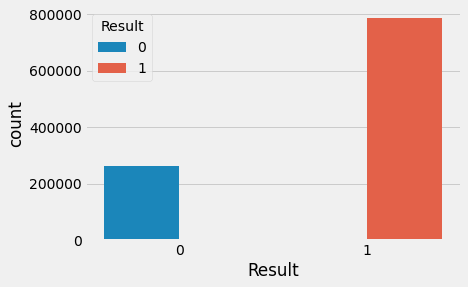

In [31]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='Result', data=datacopy,hue='Result')

In [32]:
datacopy['Result'].value_counts()

1    786407
0    262168
Name: Result, dtype: int64

### There are 2,62,168 fraud claims in the insurance company out of 10,48,575 total claims, which indicates around 25% fraudulent claims

In [33]:
datacopy['Area_Service'].value_counts()

Hudson Valley      263530
Western NY         180459
Central NY         171251
Capital/Adirond    170671
Finger Lakes       156186
New York City       74629
Southern Tier       31849
Name: Area_Service, dtype: int64

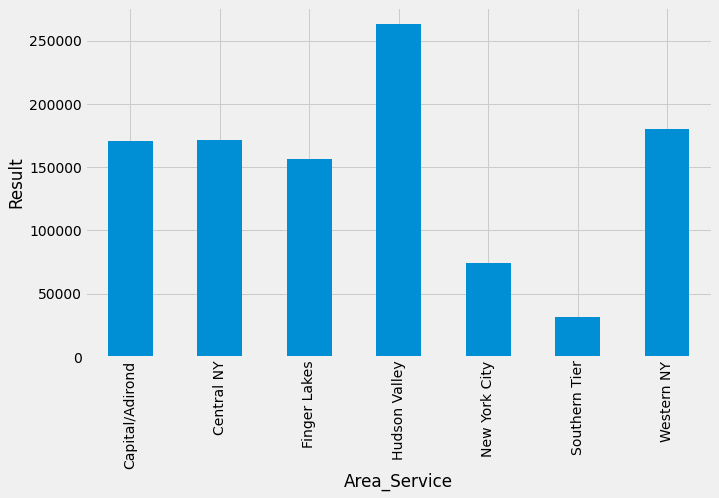

In [34]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Area_Service').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

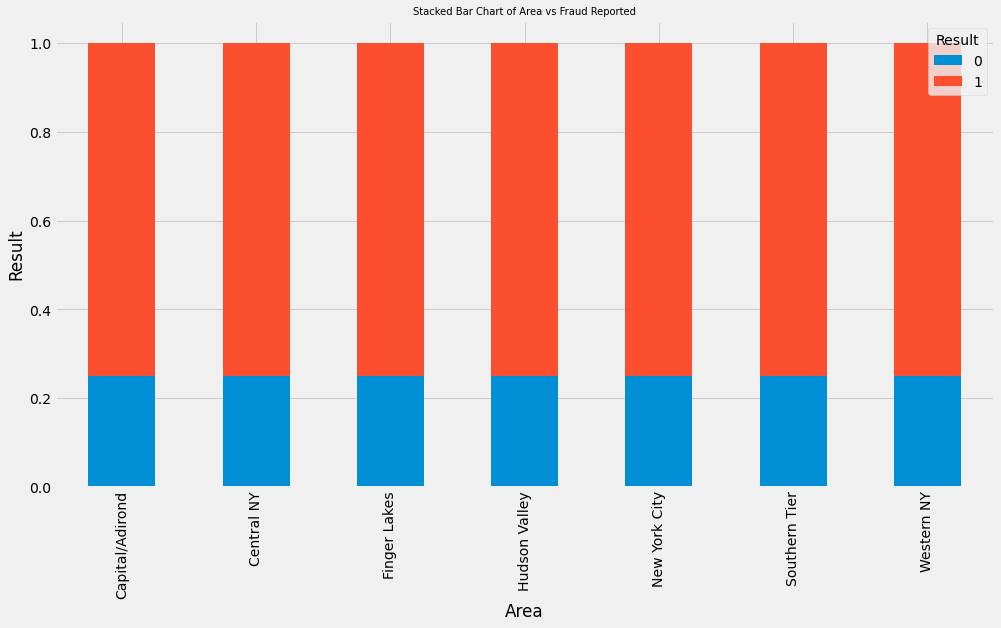

In [35]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Area_Service, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Area vs Fraud Reported', fontsize=10)
plt.xlabel('Area')
plt.ylabel('Result')
plt.show()

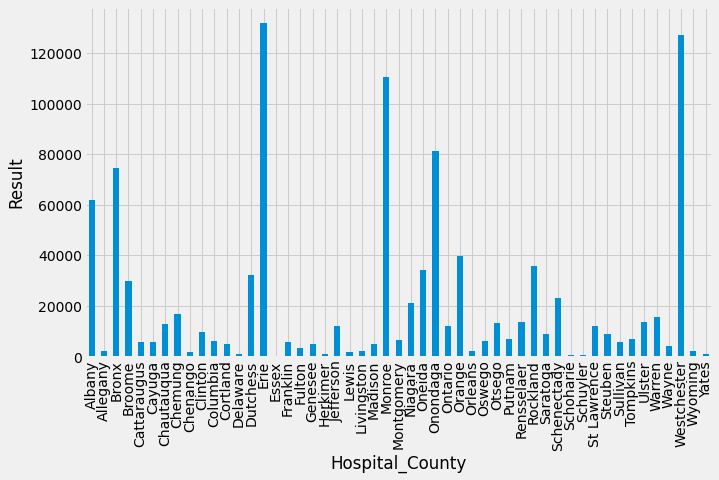

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Hospital_County').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

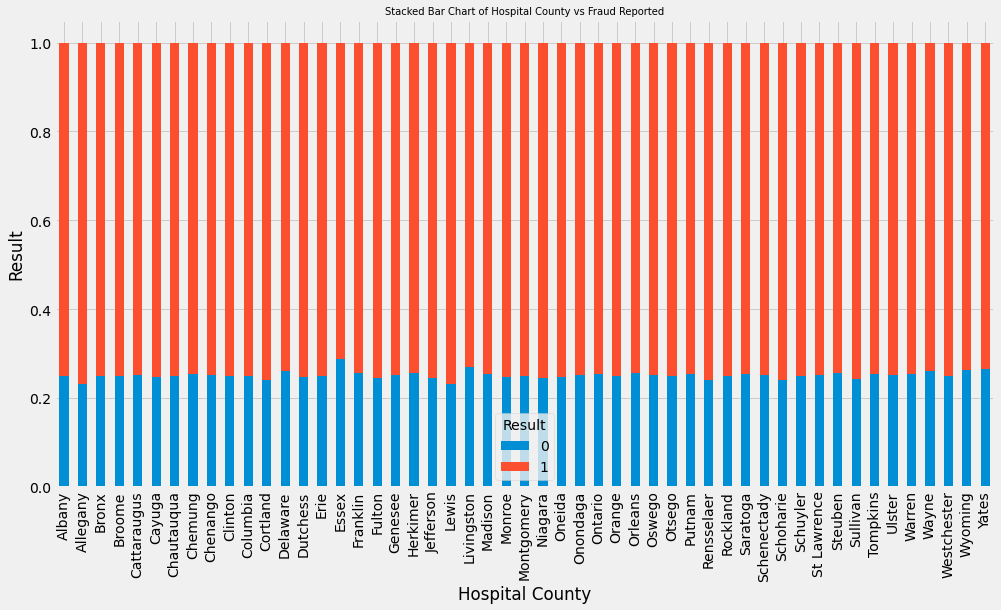

In [37]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Hospital_County, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Hospital County vs Fraud Reported', fontsize=10)
plt.xlabel('Hospital County')
plt.ylabel('Result')
plt.show()

In [38]:
pd.crosstab(datacopy.Hospital_County, datacopy.Result)

Result               0      1
Hospital_County              
Albany           15384  46380
Allegany           481   1590
Bronx            18676  55953
Broome            7480  22373
Cattaraugus       1454   4339
Cayuga            1404   4281
Chautauqua        3190   9590
Chemung           4245  12490
Chenango           501   1495
Clinton           2470   7453
Columbia          1586   4746
Cortland          1175   3713
Delaware           254    722
Dutchess          7970  24307
Erie             32983  98715
Essex              128    315
Franklin          1505   4370
Fulton             862   2665
Genesee           1254   3723
Herkimer           236    685
Jefferson         2920   9023
Lewis              445   1480
Livingston         571   1551
Madison           1292   3803
Monroe           27383  83209
Montgomery        1617   4842
Niagara           5182  15893
Oneida            8474  25691
Onondaga         20488  60761
Ontario           3049   8975
Orange            9909  29847
Orleans            540   1562
Oswego            1544   4566
Otsego            3303   9909
Putnam            1780   5239
Rensselaer        3337  10552
Rockland          8940  26755
Saratoga          2283   6672
Schenectady       5862  17383
Schoharie          124    390
Schuyler           213    637
St Lawrence       3100   9178
Steuben           2271   6560
Sullivan          1384   4320
Tompkins          1782   5210
Ulster            3426  10189
Warren            3954  11603
Wayne             1081   3054
Westchester      31802  95206
Wyoming            635   1784
Yates              239    658

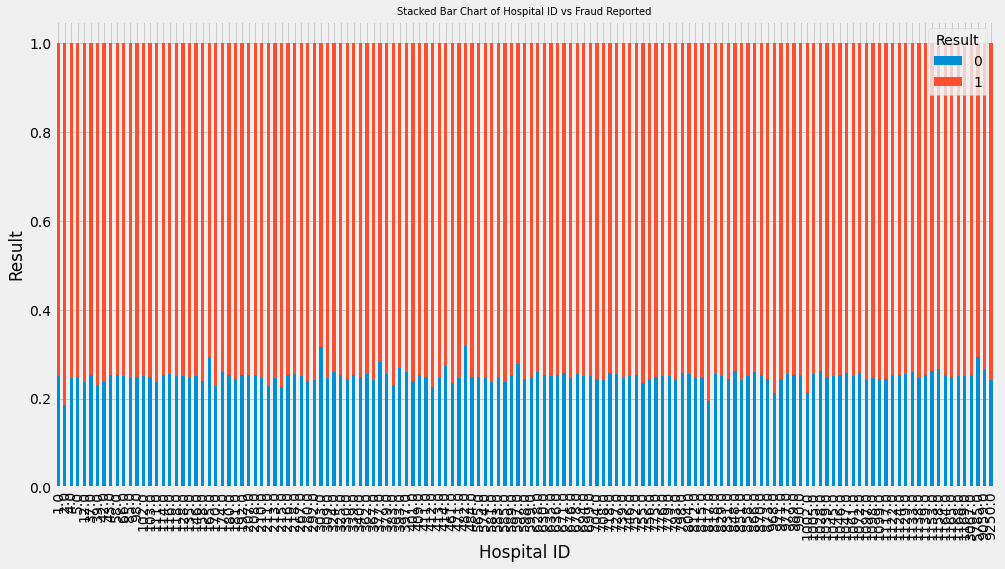

In [39]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Hospital_Id, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Hospital ID vs Fraud Reported', fontsize=10)
plt.xlabel('Hospital ID')
plt.ylabel('Result')
plt.show()

In [40]:
pd.crosstab(datacopy.Hospital_Id, datacopy.Result)

Result          0      1
Hospital_Id             
1.0          8209  24651
2.0             5     22
4.0           982   3022
5.0          6188  18685
12.0          264    848
...           ...    ...
1169.0       8246  24689
3067.0       4536  13435
5785.0         80    192
9059.0        134    369
9250.0        574   1799

[143 rows x 2 columns]

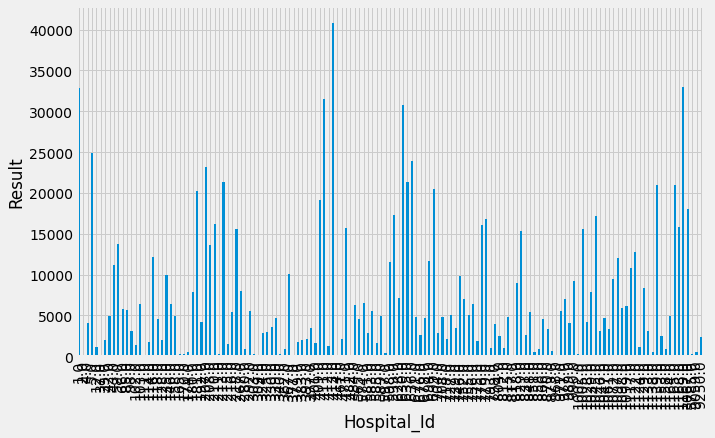

In [41]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Hospital_Id').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

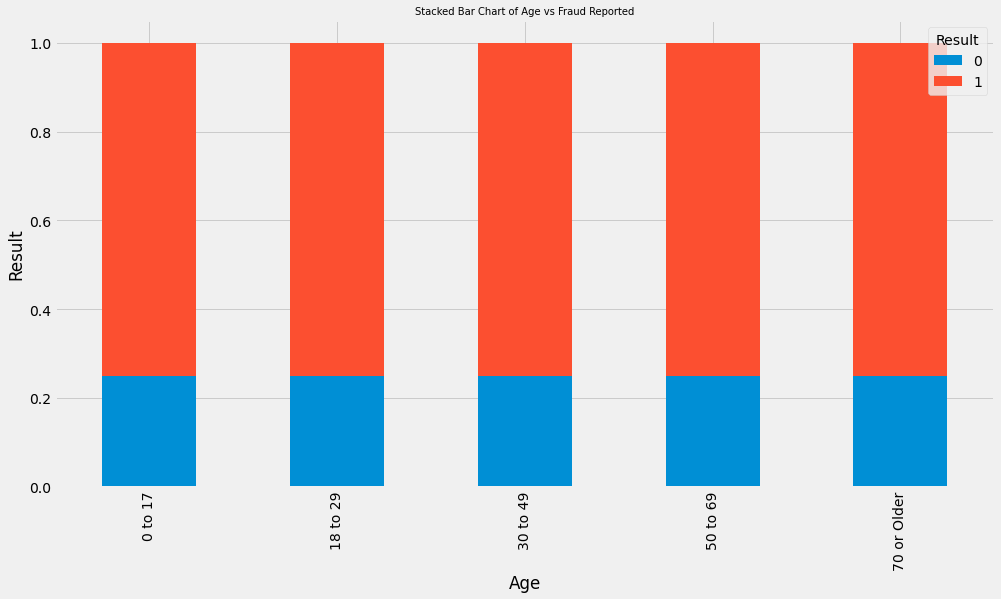

In [42]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Age, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs Fraud Reported', fontsize=10)
plt.xlabel('Age')
plt.ylabel('Result')
plt.show()

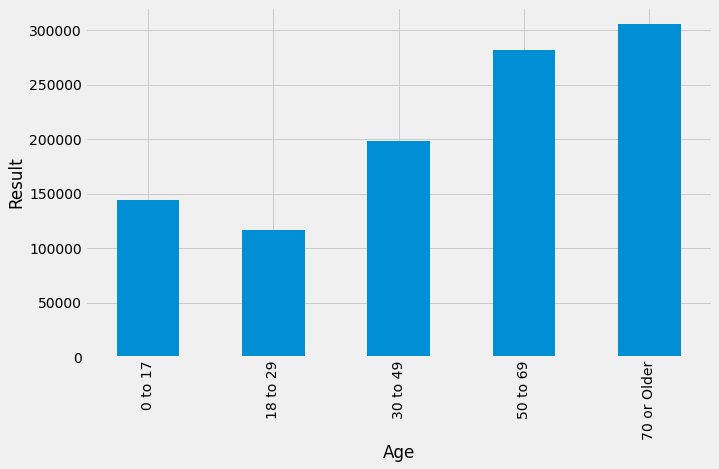

In [43]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Age').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [44]:
pd.crosstab(datacopy.Age, datacopy.Result)

Result           0       1
Age                       
0 to 17      36223  108384
18 to 29     29342   87769
30 to 49     49543  149284
50 to 69     70391  211622
70 or Older  76669  229348

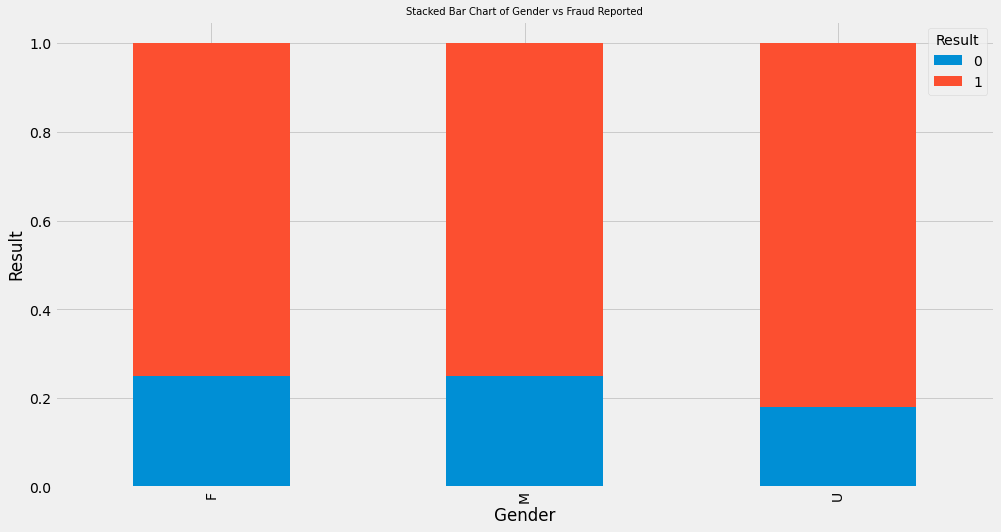

In [45]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Gender, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Fraud Reported', fontsize=10)
plt.xlabel('Gender')
plt.ylabel('Result')
plt.show()

In [46]:
pd.crosstab(datacopy.Gender, datacopy.Result)

Result       0       1
Gender                
F       148357  445149
M       113802  341217
U            9      41

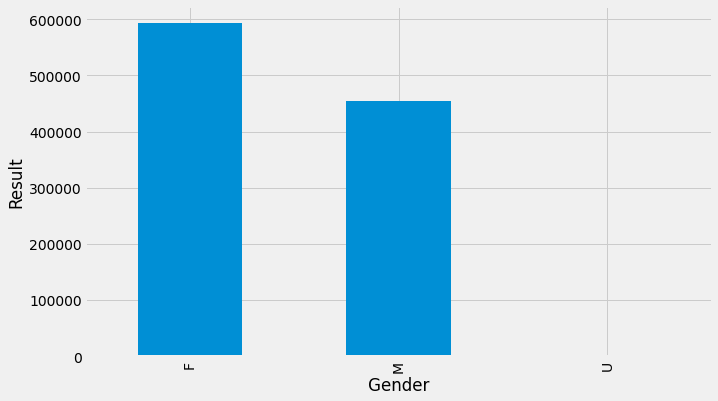

In [47]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Gender').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

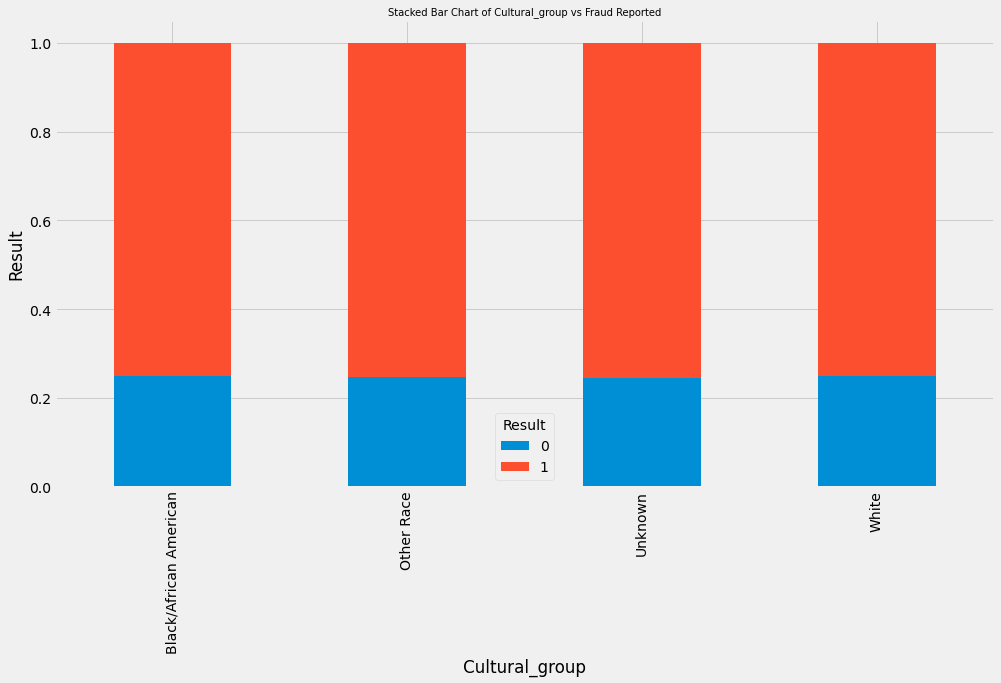

In [48]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Cultural_group, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Cultural_group vs Fraud Reported', fontsize=10)
plt.xlabel('Cultural_group')
plt.ylabel('Result')
plt.show()

In [49]:
pd.crosstab(datacopy.Cultural_group, datacopy.Result)

Result                       0       1
Cultural_group                        
Black/African American   33903  101260
Other Race               31769   96153
Unknown                    938    2894
White                   195558  586100

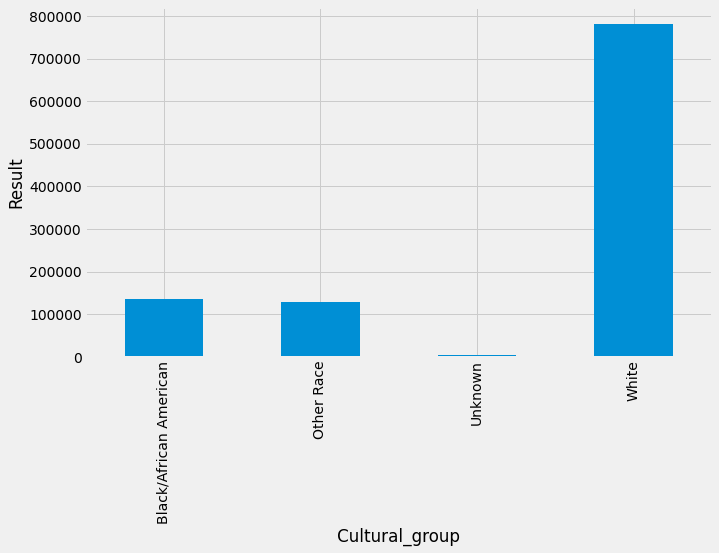

In [50]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('Cultural_group').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

### It is observed that in Cultutal Groups amongst 5, White group is having more claims towards the insurance irrelevant with Fraudulent or non-Fraudulent case

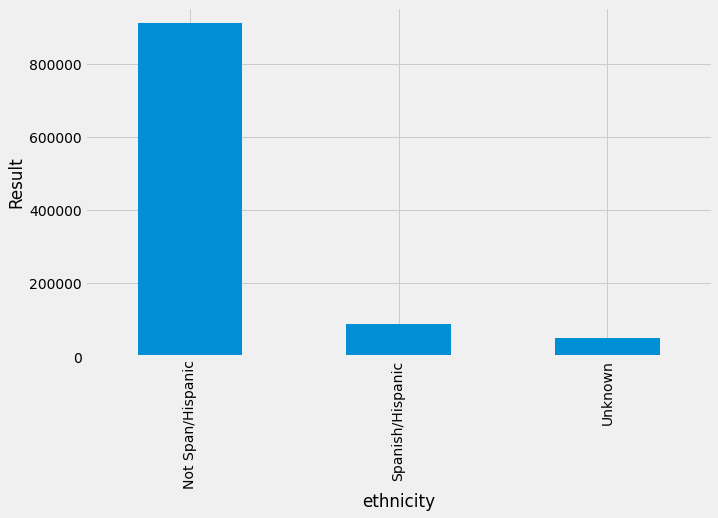

In [51]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = datacopy.groupby('ethnicity').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [52]:
pd.crosstab(datacopy.ethnicity, datacopy.Result)

Result                  0       1
ethnicity                        
Not Span/Hispanic  227902  682653
Spanish/Hispanic    21795   66166
Unknown             12471   37588

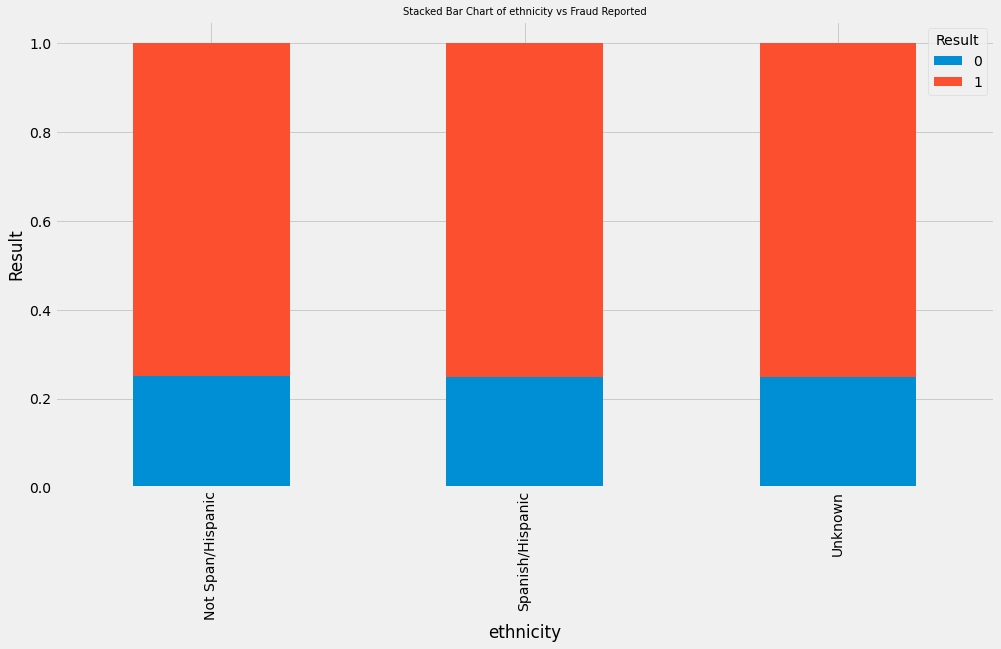

In [53]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.ethnicity, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of ethnicity vs Fraud Reported', fontsize=10)
plt.xlabel('ethnicity')
plt.ylabel('Result')
plt.show()

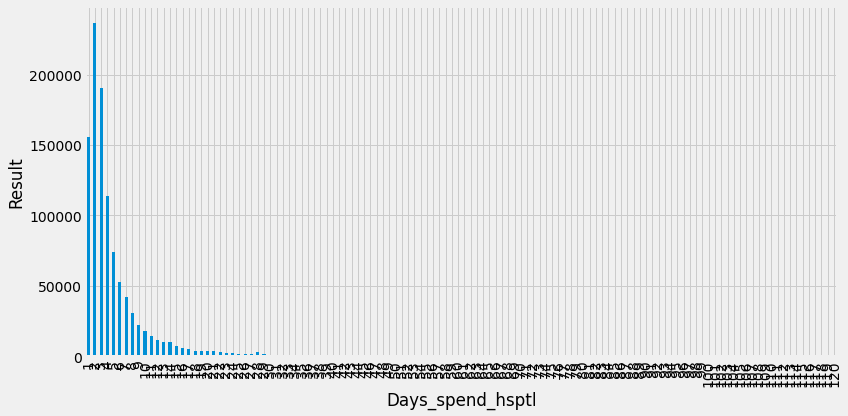

In [54]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,6))
ax = datacopy.groupby('Days_spend_hsptl').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [55]:
pd.crosstab(datacopy.Days_spend_hsptl,datacopy.Result)

Result                0       1
Days_spend_hsptl               
1                 38958  116897
2                 59184  177354
3                 47424  142962
4                 28559   85238
5                 18515   55169
...                 ...     ...
116                   7      13
117                   6      15
118                   4      23
119                   6      20
120                 202     563

[120 rows x 2 columns]

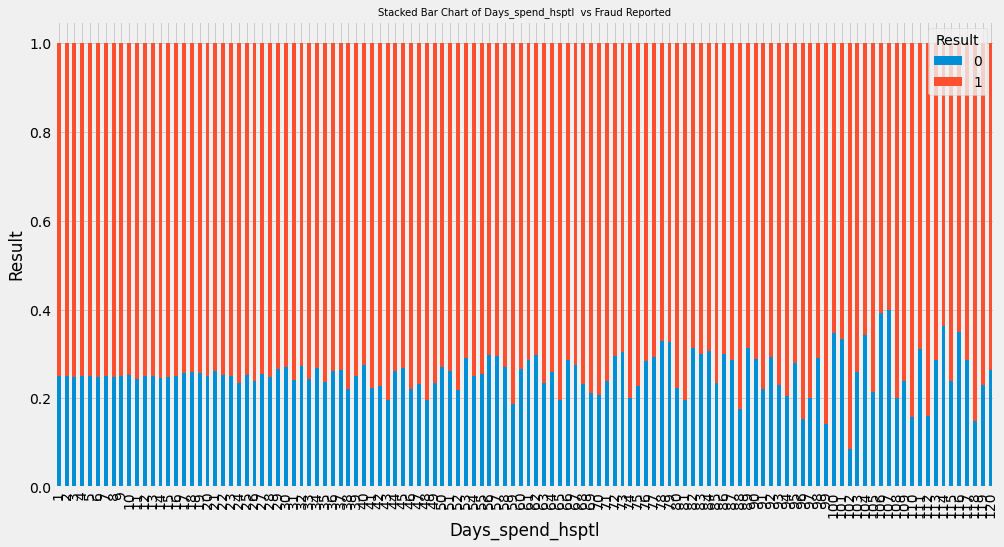

In [56]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Days_spend_hsptl, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Days_spend_hsptl  vs Fraud Reported', fontsize=10)
plt.xlabel('Days_spend_hsptl')
plt.ylabel('Result')
plt.show()

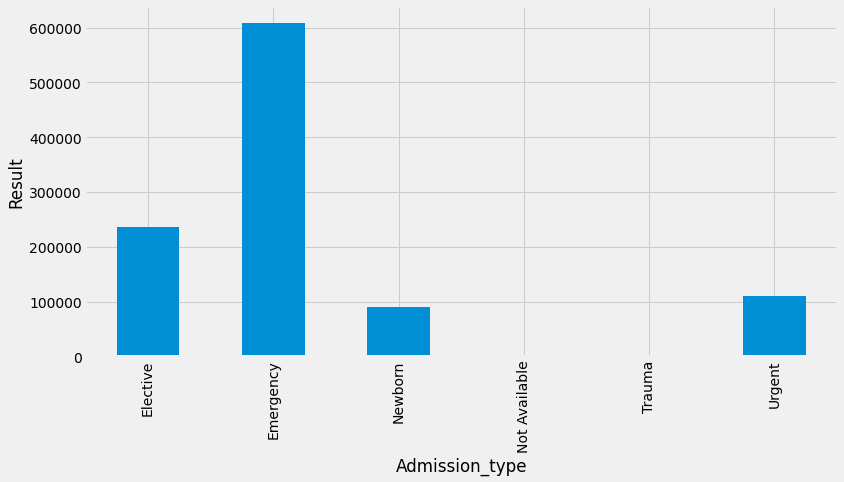

In [57]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (12,6))
ax = datacopy.groupby('Admission_type').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [58]:
pd.crosstab(datacopy.Admission_type,datacopy.Result)

Result               0       1
Admission_type                
Elective         59098  176557
Emergency       151830  456765
Newborn          22654   68055
Not Available      252     768
Trauma             563    1695
Urgent           27771   82567

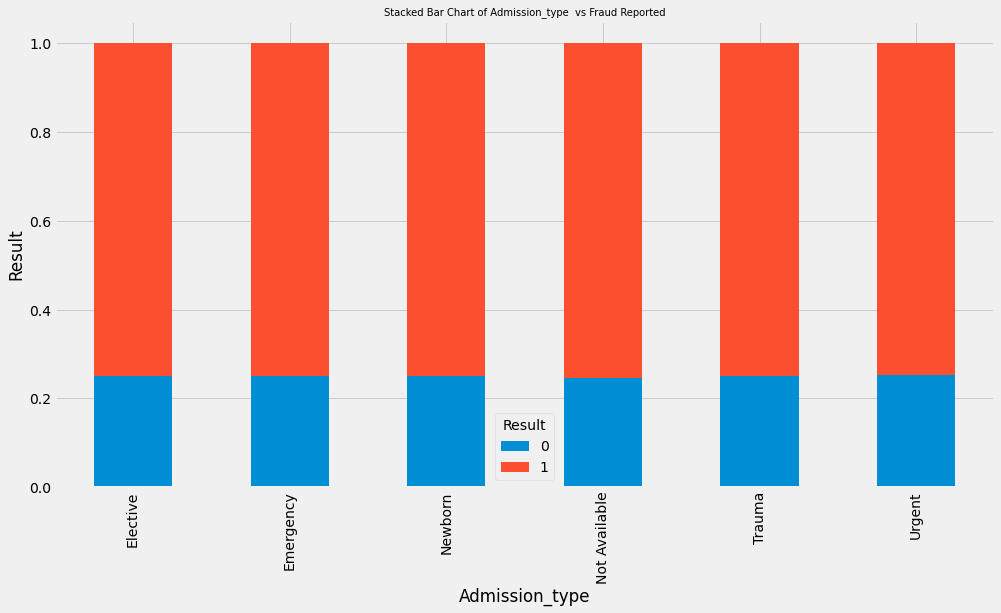

In [59]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Admission_type, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Admission_type  vs Fraud Reported', fontsize=10)
plt.xlabel('Admission_type')
plt.ylabel('Result')
plt.show()

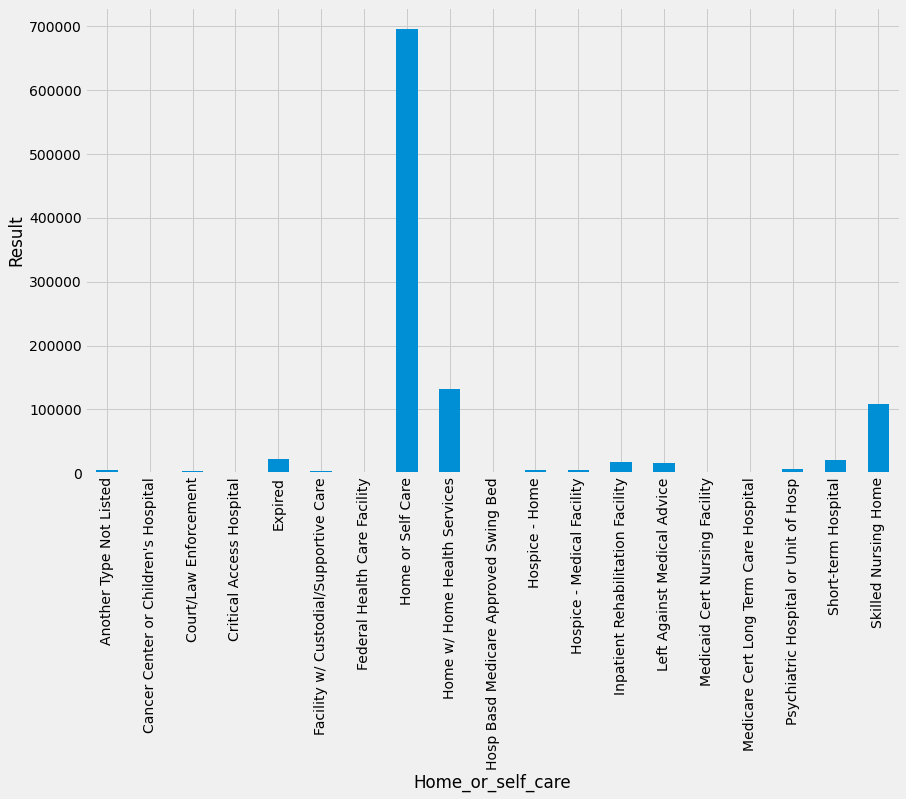

In [60]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Home_or_self_care').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [61]:
pd.crosstab(datacopy.Home_or_self_care, datacopy.Result)

Result                                      0       1
Home_or_self_care                                    
Another Type Not Listed                  1175    3377
Cancer Center or Children's Hospital      491    1392
Court/Law Enforcement                     849    2438
Critical Access Hospital                    7      25
Expired                                  5785   17021
Facility w/ Custodial/Supportive Care     844    2648
Federal Health Care Facility              126     329
Home or Self Care                      173474  521367
Home w/ Home Health Services            33002   99112
Hosp Basd Medicare Approved Swing Bed     495    1384
Hospice - Home                           1216    3519
Hospice - Medical Facility               1151    3633
Inpatient Rehabilitation Facility        4476   12898
Left Against Medical Advice              4208   12828
Medicaid Cert Nursing Facility              2       5
Medicare Cert Long Term Care Hospital     522    1606
Psychiatric Hospital or Unit of Hosp     1739    4971
Short-term Hospital                      5391   16071
Skilled Nursing Home                    27215   81783

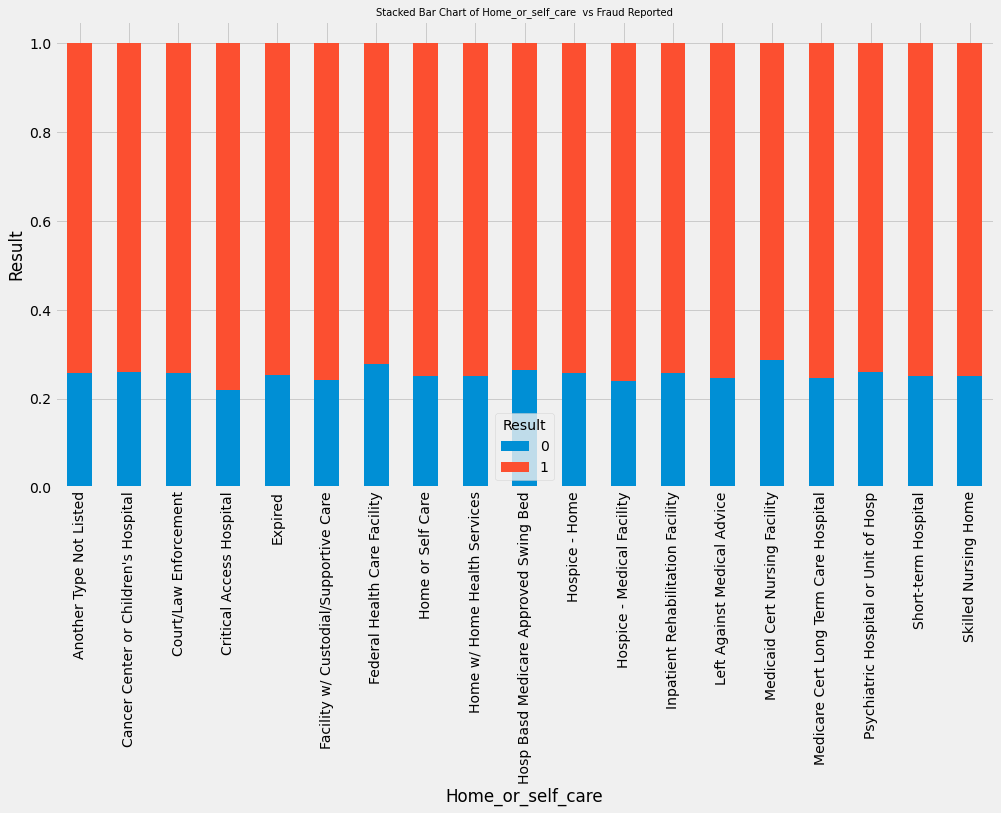

In [62]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Home_or_self_care, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Home_or_self_care  vs Fraud Reported', fontsize=10)
plt.xlabel('Home_or_self_care')
plt.ylabel('Result')
plt.show()

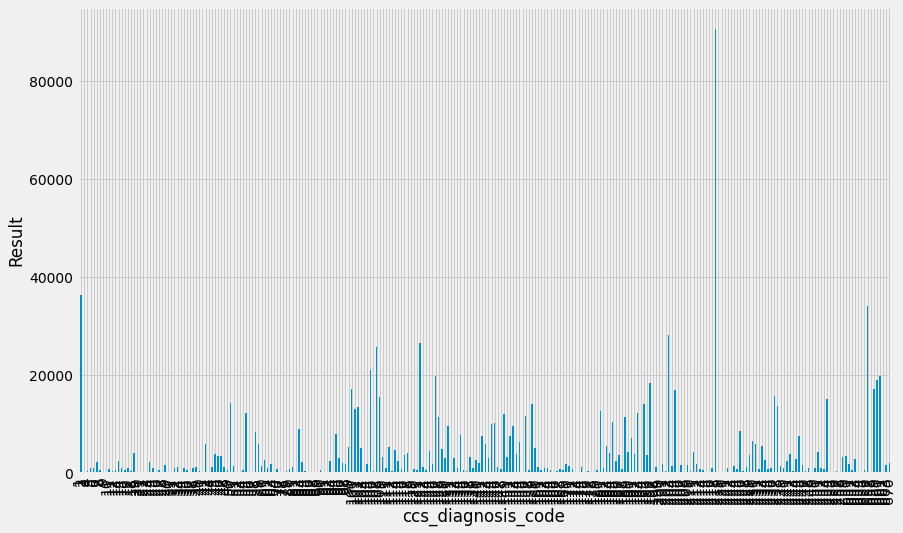

In [63]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('ccs_diagnosis_code').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [64]:
pd.crosstab(datacopy.ccs_diagnosis_code, datacopy.Result)

Result                 0      1
ccs_diagnosis_code             
1                     19     68
2                   9138  27173
3                     50    177
4                    141    389
5                    253    791
...                  ...    ...
660                 4699  14245
661                 4914  14937
662                    8     25
663                  411   1348
670                  518   1494

[262 rows x 2 columns]

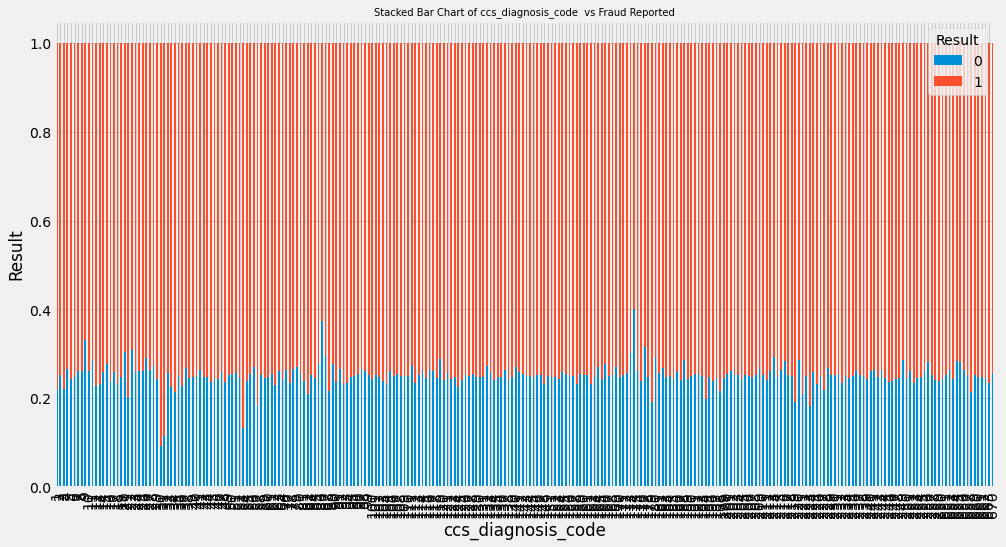

In [65]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.ccs_diagnosis_code, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of ccs_diagnosis_code  vs Fraud Reported', fontsize=10)
plt.xlabel('ccs_diagnosis_code')
plt.ylabel('Result')
plt.show()

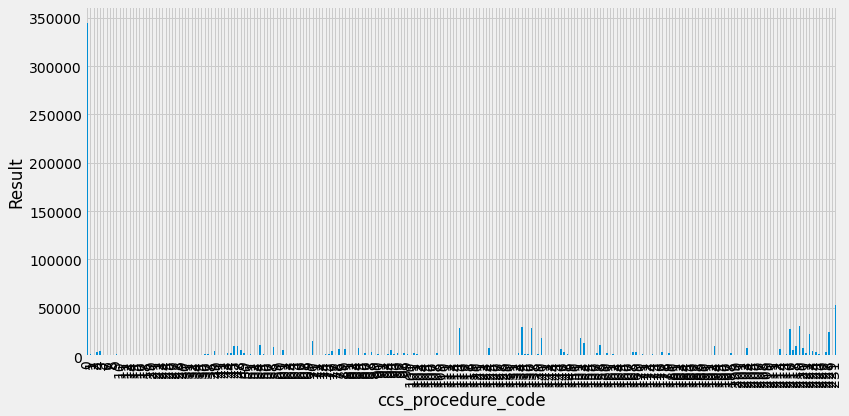

In [66]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (12,6))
ax = datacopy.groupby('ccs_procedure_code').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [67]:
pd.crosstab(datacopy.ccs_procedure_code,datacopy.Result)

Result                  0       1
ccs_procedure_code               
0                   85929  258687
1                     608    1958
2                     146     466
3                    1118    3248
4                    1331    3809
...                   ...     ...
226                   162     519
227                  1084    3279
228                  6283   18946
229                    52     168
231                 12953   39891

[230 rows x 2 columns]

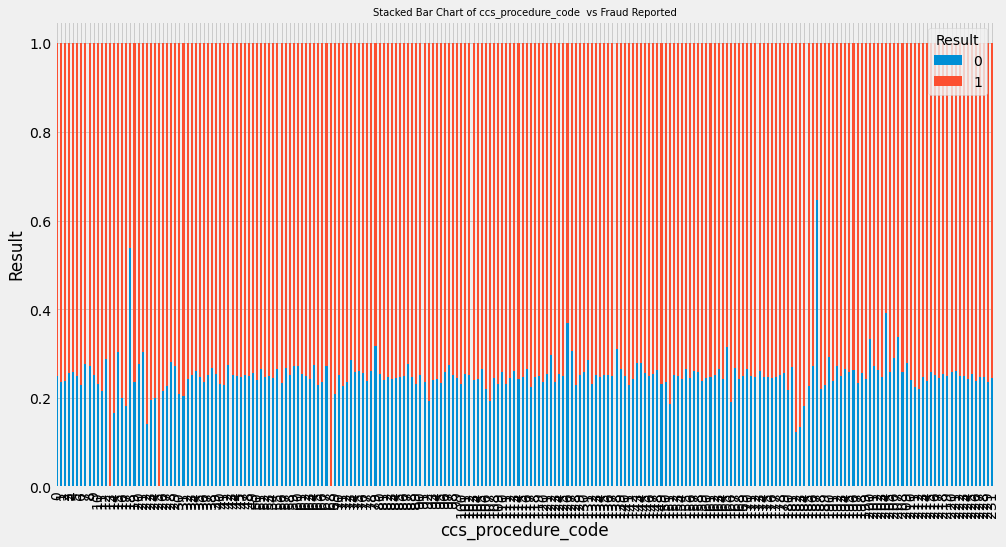

In [68]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.ccs_procedure_code, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of ccs_procedure_code  vs Fraud Reported', fontsize=10)
plt.xlabel('ccs_procedure_code')
plt.ylabel('Result')
plt.show()

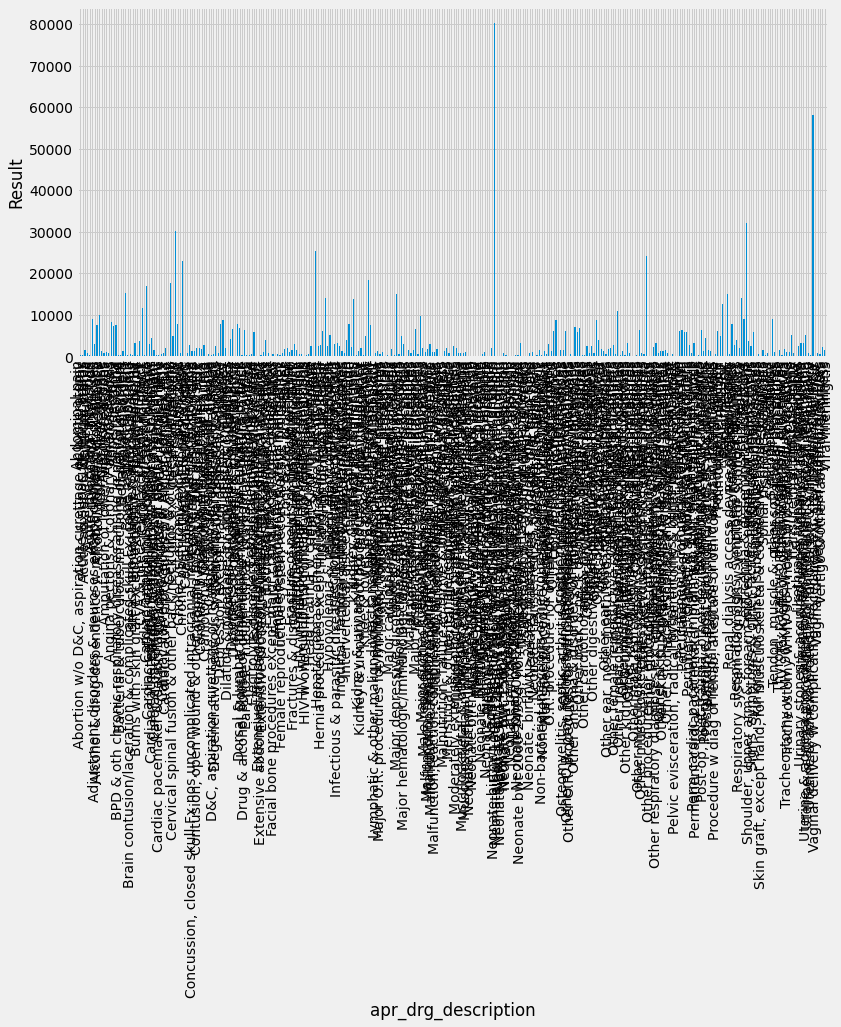

In [69]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (12,6))
ax = datacopy.groupby('apr_drg_description').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [70]:
pd.crosstab(datacopy.apr_drg_description, datacopy.Result)

Result                                                 0     1
apr_drg_description                                           
Abdominal pain                                      1096  3103
Abortion w/o D&C, aspiration curettage or hyste...   126   318
Acute & subacute endocarditis                         69   232
Acute anxiety & delirium states                      396  1260
Acute leukemia                                       185   577
...                                                  ...   ...
Vaginal delivery w sterilization &/or D&C            233   717
Ventricular shunt procedures                         168   510
Vertigo & other labyrinth disorders                  562  1849
Viral illness                                        447  1196
Viral meningitis                                     164   468

[316 rows x 2 columns]

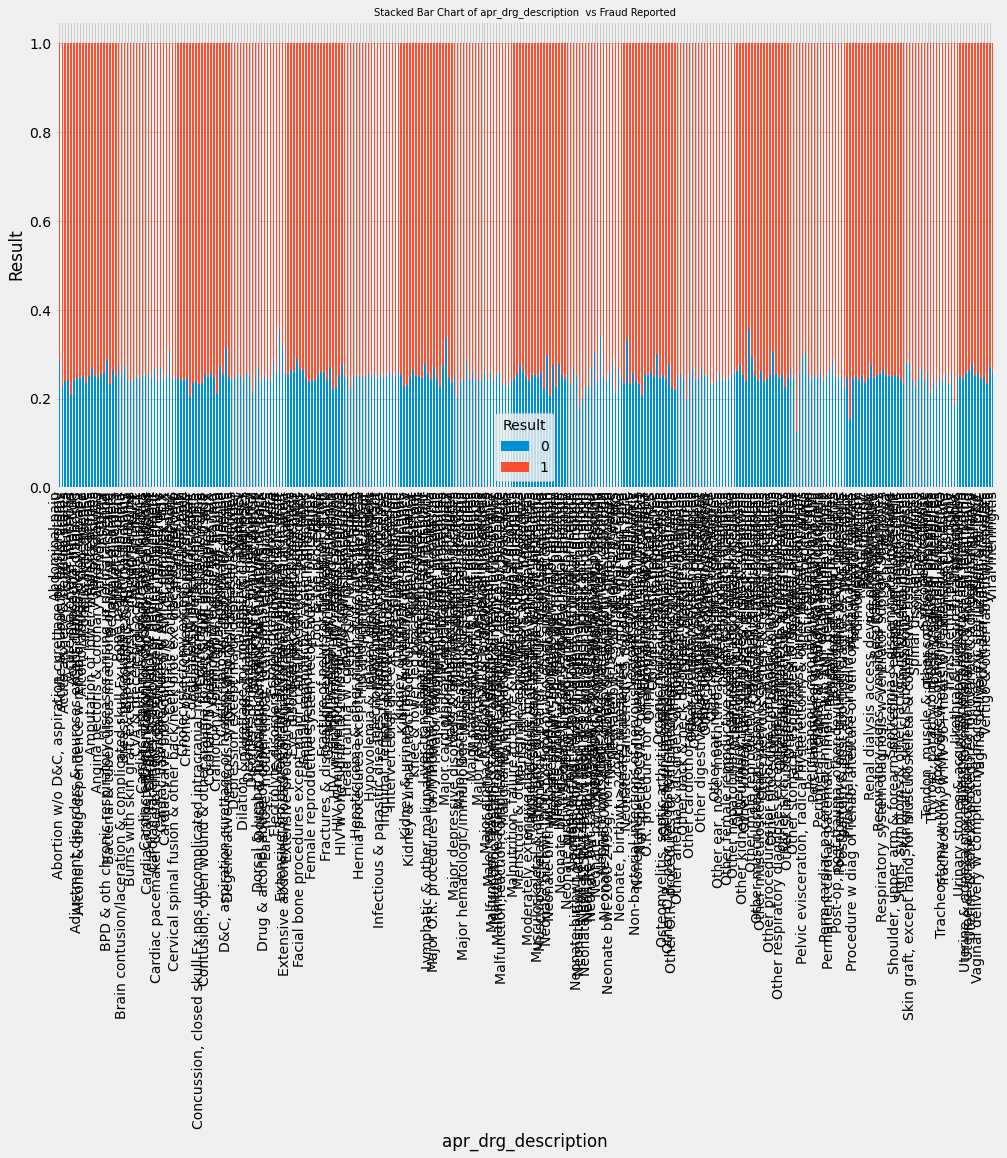

In [71]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.apr_drg_description, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of apr_drg_description  vs Fraud Reported', fontsize=10)
plt.xlabel('apr_drg_description')
plt.ylabel('Result')
plt.show()

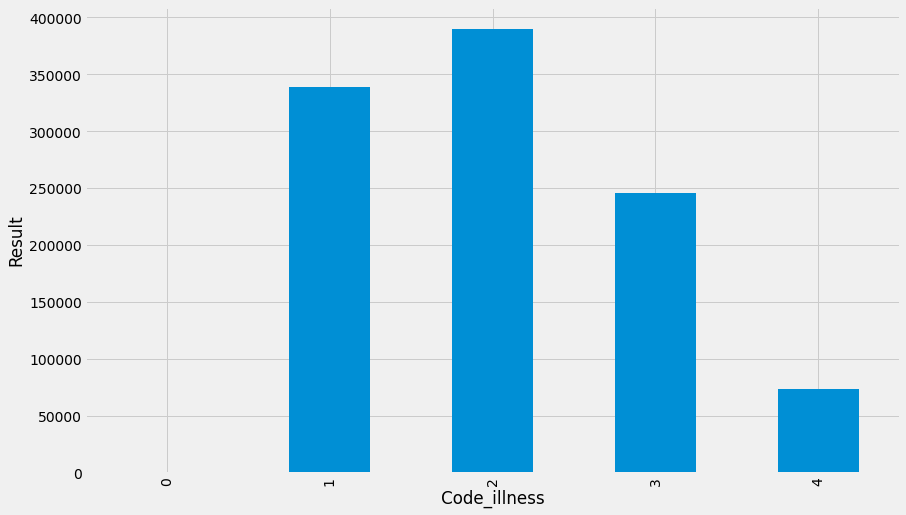

In [72]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Code_illness').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [73]:
pd.crosstab(datacopy.Code_illness, datacopy.Result)

Result            0       1
Code_illness               
0                 7      35
1             84740  254173
2             97864  292186
3             61109  184712
4             18448   55301

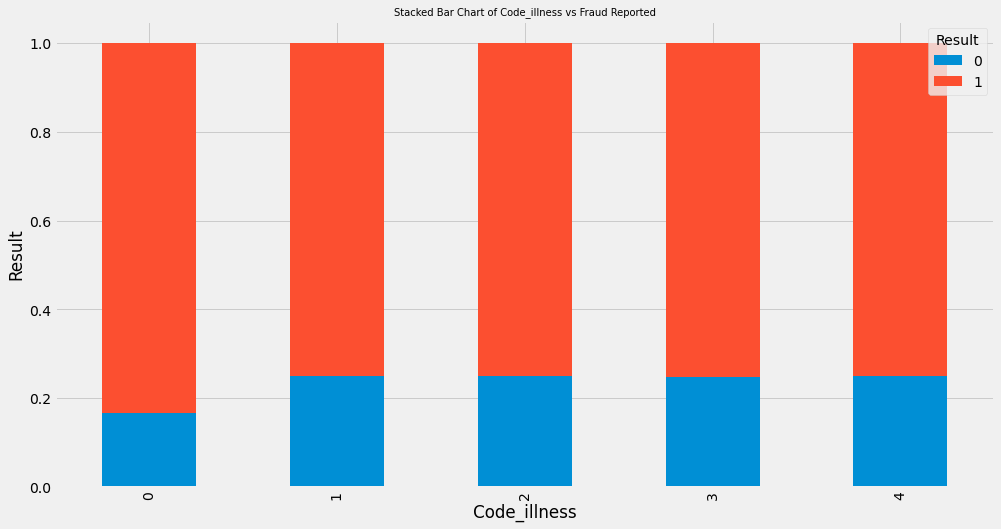

In [74]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Code_illness, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Code_illness vs Fraud Reported', fontsize=10)
plt.xlabel('Code_illness')
plt.ylabel('Result')
plt.show()

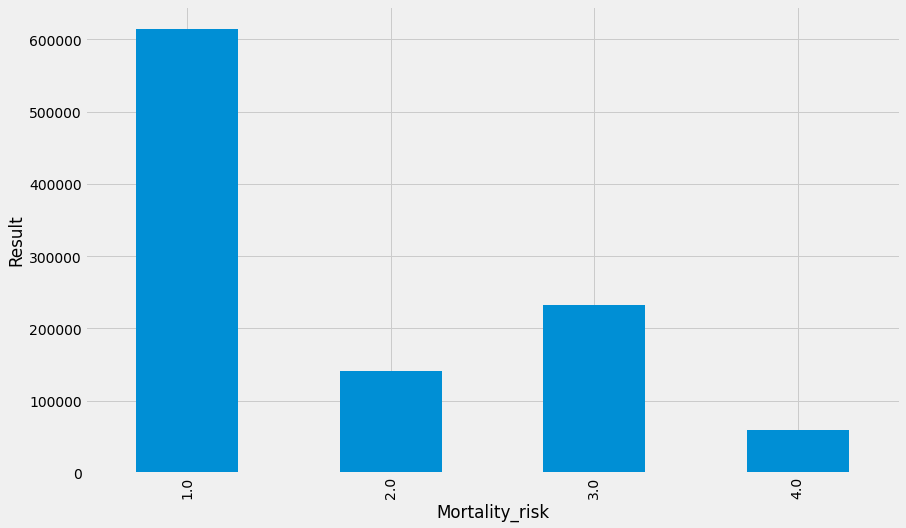

In [75]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Mortality_risk').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

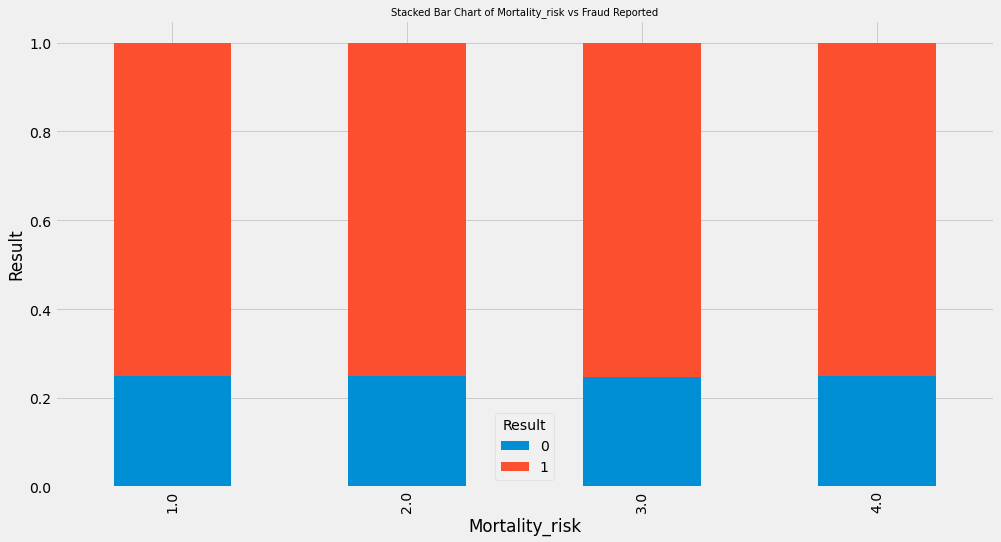

In [76]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Mortality_risk, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Mortality_risk vs Fraud Reported', fontsize=10)
plt.xlabel('Mortality_risk')
plt.ylabel('Result')
plt.show()

In [77]:
pd.crosstab(datacopy.Mortality_risk, datacopy.Result)

Result               0       1
Mortality_risk                
1.0             154209  460911
2.0              35260  106051
3.0              57746  174693
4.0              14953   44752

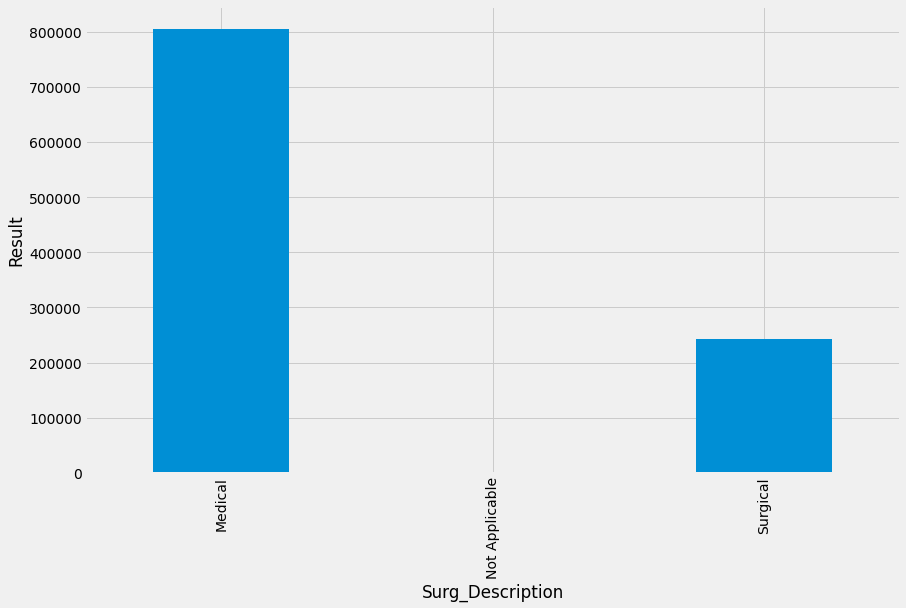

In [78]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Surg_Description').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [79]:
pd.crosstab(datacopy.Surg_Description, datacopy.Result)

Result                 0       1
Surg_Description                
Medical           200909  604820
Not Applicable         7      35
Surgical           61252  181552

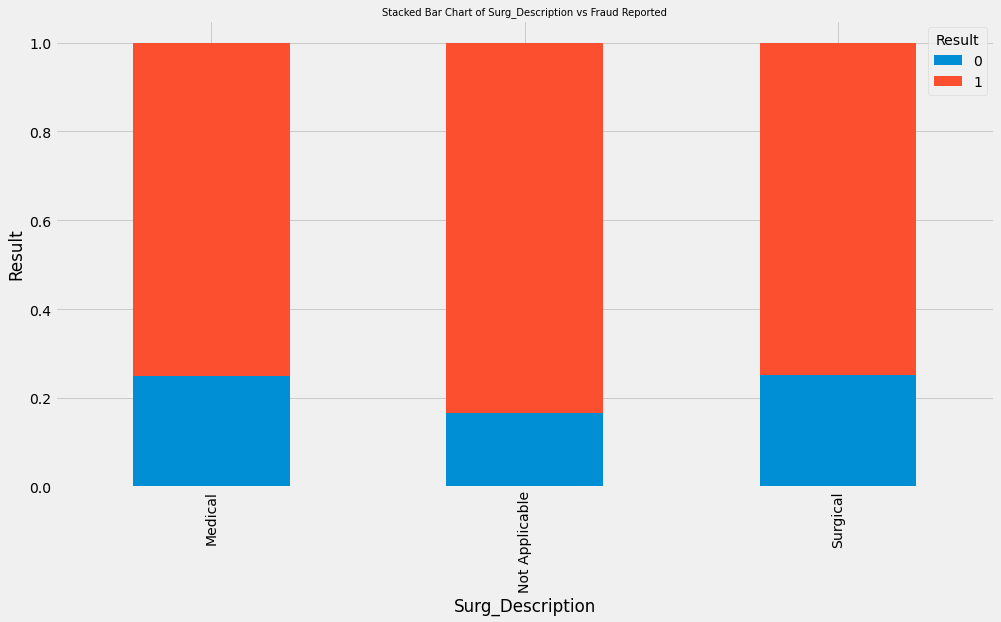

In [80]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Surg_Description, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Surg_Description vs Fraud Reported', fontsize=10)
plt.xlabel('Surg_Description')
plt.ylabel('Result')
plt.show()

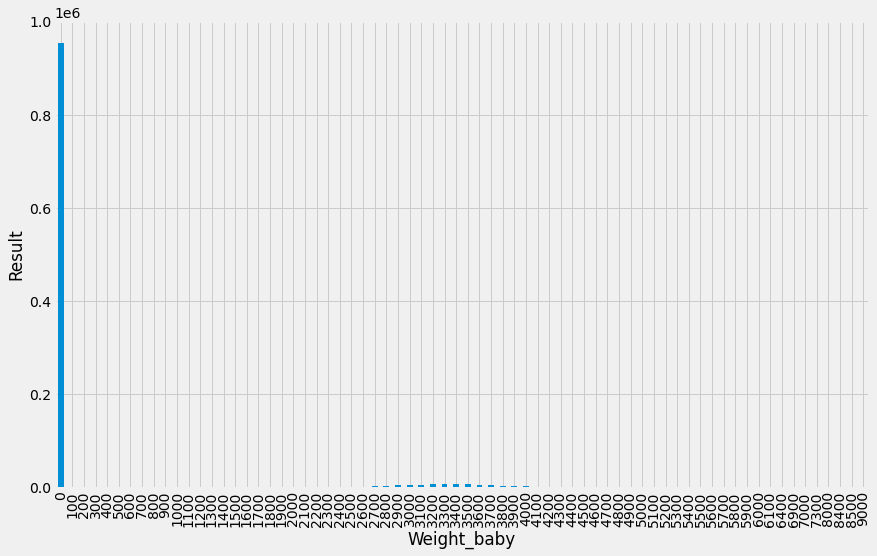

In [81]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Weight_baby').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [82]:
pd.crosstab(datacopy.Weight_baby, datacopy.Result)

Result            0       1
Weight_baby                
0            238468  715333
100               0       7
200               5      24
300               9      31
400              15      56
...             ...     ...
7300              0       1
8000              0       1
8400              1       0
8500              0       1
9000              1       0

[70 rows x 2 columns]

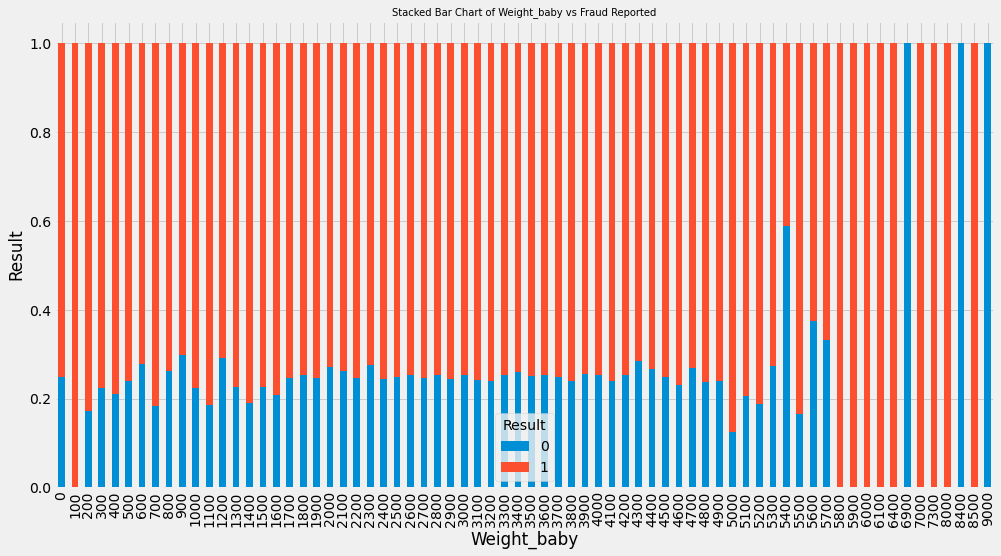

In [83]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Weight_baby, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Weight_baby vs Fraud Reported', fontsize=10)
plt.xlabel('Weight_baby')
plt.ylabel('Result')
plt.show()

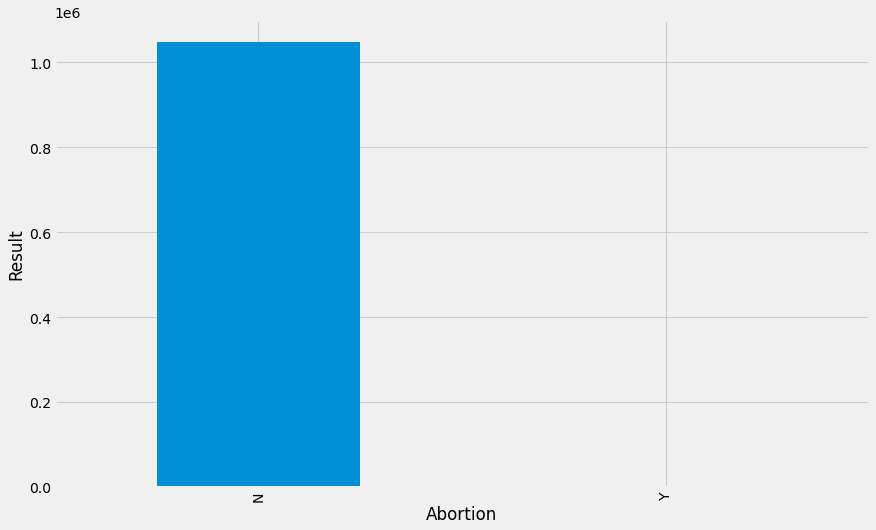

In [84]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Abortion').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [85]:
pd.crosstab(datacopy.Abortion, datacopy.Result)

Result         0       1
Abortion                
N         261746  785364
Y            422    1043

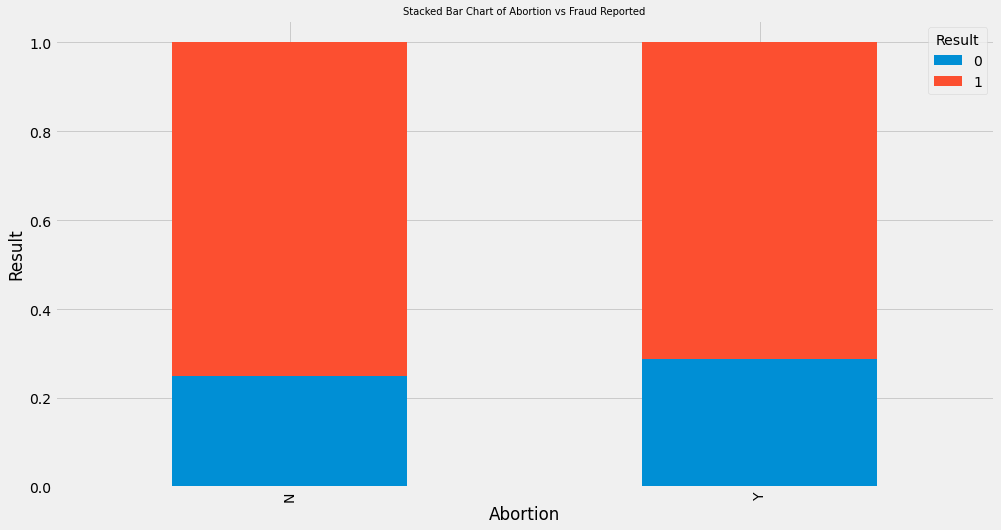

In [86]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Abortion, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Abortion vs Fraud Reported', fontsize=10)
plt.xlabel('Abortion')
plt.ylabel('Result')
plt.show()

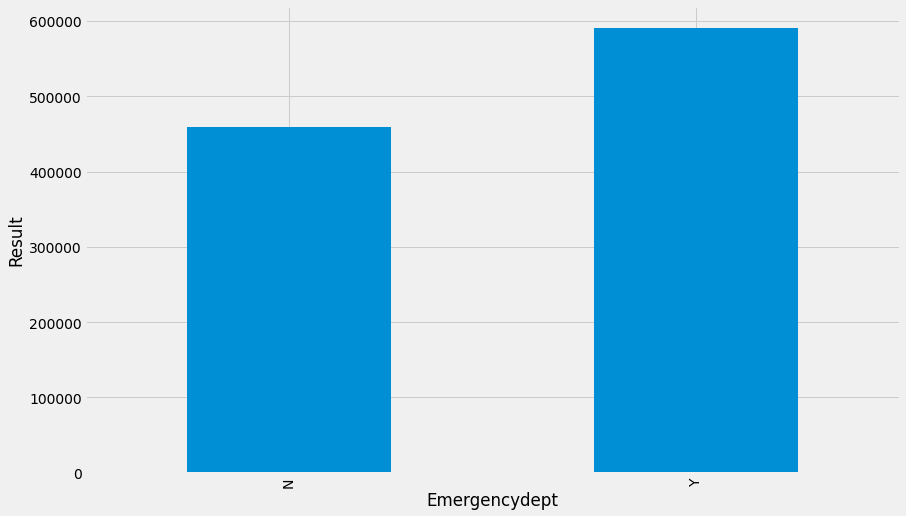

In [87]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Emergencydept').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [88]:
pd.crosstab(datacopy.Emergencydept, datacopy.Result)

Result              0       1
Emergencydept                
N              114983  343638
Y              147185  442769

In [89]:
datacopy.Tot_charg.nunique()

869659

In [90]:
datacopy.Tot_cost.nunique()

766537

In [91]:
datacopy.ratio_of_total_costs_to_total_charges.nunique()

987065

### Since, these 3 columns have 7-9 lakh significant values which will not influence the fraudulent cases as there will be very random variation and these columns will be dropped from the dataset.

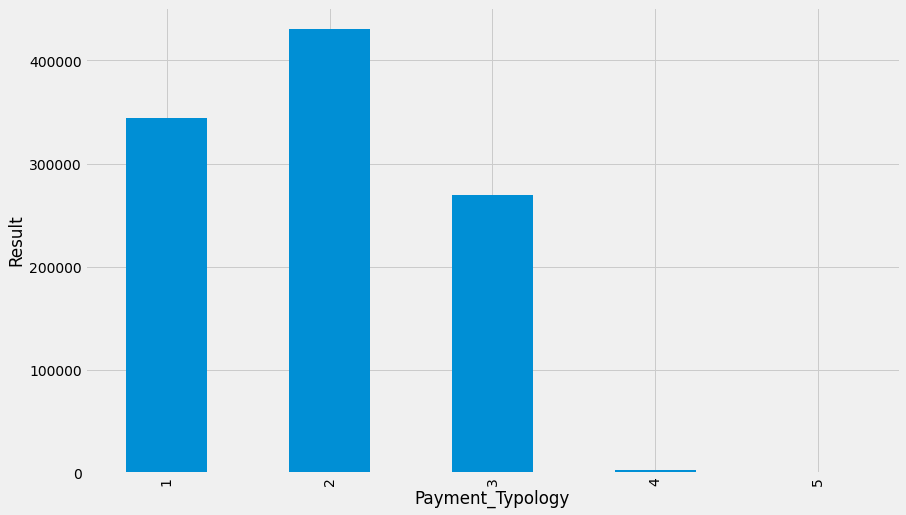

In [98]:
plt.style.use('fivethirtyeight')
figure = plt.figure(figsize = (13,8))
ax = datacopy.groupby('Payment_Typology').Result.count().plot.bar(ylim=0)
ax.set_ylabel('Result')
plt.show()

In [99]:
pd.crosstab(datacopy.Payment_Typology, datacopy.Result)

Result                 0       1
Payment_Typology                
1                  86328  258115
2                 107474  323217
3                  67466  202405
4                    879    2625
5                     21      45

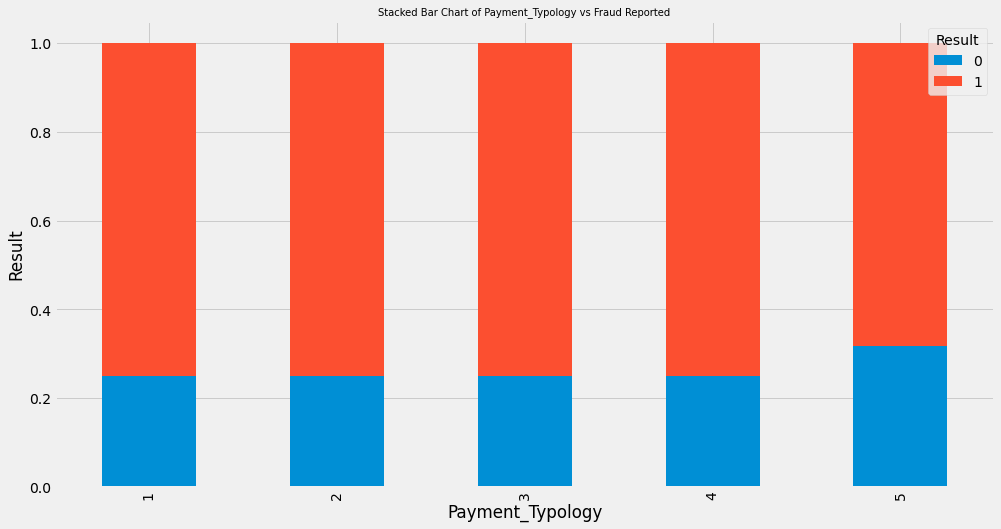

In [100]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(datacopy.Payment_Typology, datacopy.Result)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Payment_Typology vs Fraud Reported', fontsize=10)
plt.xlabel('Payment_Typology')
plt.ylabel('Result')
plt.show()

# Encoding Categorical Variables

In [101]:
from sklearn.preprocessing import LabelBinarizer
label_binizer =LabelBinarizer()

In [102]:
datacopy.select_dtypes(include=['object']).head(2)
unique, counts = np.unique(str().split(), return_counts=True)

In [103]:
one_hot_Area_Service = label_binizer.fit(datacopy.Area_Service)
one_hot_Hospital_County = label_binizer.fit(datacopy.Hospital_County)
one_hot_Age = label_binizer.fit(datacopy.Age)
one_hot_Gender = label_binizer.fit(datacopy.Gender)
one_hot_Cultural_group = label_binizer.fit(datacopy.Cultural_group)
one_hot_ethnicity = label_binizer.fit(datacopy.ethnicity)
one_hot_Admission_type = label_binizer.fit(datacopy.Admission_type)
one_hot_Home_or_self_care = label_binizer.fit(datacopy.Home_or_self_care)
one_hot_apr_drg_description = label_binizer.fit(datacopy.apr_drg_description)
one_hot_Surg_Description = label_binizer.fit(datacopy.Surg_Description)
one_hot_Surg_Description = label_binizer.fit(datacopy.Surg_Description)
one_hot_Abortion = label_binizer.fit(datacopy.Abortion)
one_hot_Emergencydept = label_binizer.fit(datacopy.Emergencydept)


In [104]:
one_hot_coder_list = [one_hot_Area_Service,one_hot_Hospital_County,one_hot_Age,one_hot_Gender,one_hot_Cultural_group,one_hot_ethnicity,one_hot_Admission_type,one_hot_Home_or_self_care,one_hot_apr_drg_description,one_hot_Surg_Description,one_hot_Abortion,one_hot_Emergencydept]

In [105]:
one_hot_column = ['Area_Service','Hospital_County','Age','Gender','Cultural_group','ethnicity','Admission_type','Home_or_self_care','apr_drg_description','Surg_Description','Abortion','Emergencydept']

In [106]:
k = 0
for i in one_hot_column:
    datacopy[i] = one_hot_coder_list[k].fit_transform(datacopy[i])
    k =+1

In [107]:
datacopy

Area_Service  Hospital_County  ...  Result  Payment_Typology
0                   0                0  ...       1                 1
1                   0                0  ...       1                 1
2                   0                0  ...       1                 1
3                   0                0  ...       0                 1
4                   0                0  ...       1                 1
...               ...              ...  ...     ...               ...
1048570             0                0  ...       1                 3
1048571             0                0  ...       1                 3
1048572             0                0  ...       0                 3
1048573             0                0  ...       1                 3
1048574             0                0  ...       1                 2

[1048575 rows x 24 columns]

In [108]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1048575 non-null  int64  
 1   Hospital_County                        1048575 non-null  int64  
 2   Hospital_Id                            1048575 non-null  float64
 3   Age                                    1048575 non-null  int64  
 4   Gender                                 1048575 non-null  int64  
 5   Cultural_group                         1048575 non-null  int64  
 6   ethnicity                              1048575 non-null  int64  
 7   Days_spend_hsptl                       1048575 non-null  int64  
 8   Admission_type                         1048575 non-null  int64  
 9   Home_or_self_care                      1048575 non-null  int64  
 10  ccs_diagnosis_code                     104

In [109]:
datacopy.corr()

Area_Service  ...  Payment_Typology
Area_Service                               1.000000  ...          0.018500
Hospital_County                            0.567407  ...          0.114669
Hospital_Id                               -0.074125  ...          0.150013
Age                                       -0.009740  ...         -0.116870
Gender                                    -0.000354  ...          0.006834
Cultural_group                            -0.079153  ...          0.065976
ethnicity                                  0.007265  ...          0.009042
Days_spend_hsptl                          -0.007547  ...          0.058525
Admission_type                            -0.003920  ...         -0.049861
Home_or_self_care                         -0.004633  ...          0.001004
ccs_diagnosis_code                        -0.014893  ...         -0.075638
ccs_procedure_code                        -0.058910  ...         -0.051849
apr_drg_description                        0.010863  ...          0.002089
Code_illness                               0.016161  ...          0.157933
Mortality_risk                             0.015057  ...          0.183389
Surg_Description                          -0.013664  ...          0.018000
Weight_baby                               -0.003711  ...         -0.124515
Abortion                                  -0.016492  ...         -0.007936
Emergencydept                             -0.037011  ...          0.106619
Tot_charg                                 -0.007940  ...          0.081664
Tot_cost                                  -0.017791  ...          0.057332
ratio_of_total_costs_to_total_charges     -0.032015  ...         -0.034644
Result                                     0.000016  ...          0.000565
Payment_Typology                           0.018500  ...          1.000000

[24 rows x 24 columns]

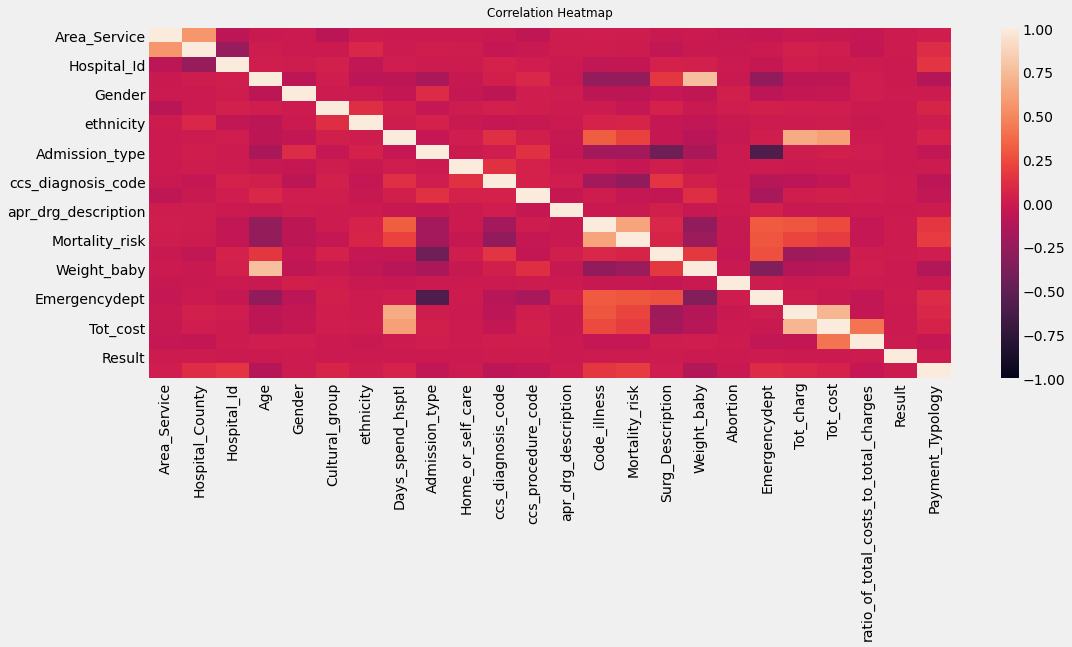

In [110]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(datacopy.corr(), vmin=-1, vmax=1, annot=False)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Outlier Detection (isolation forest)

In [111]:
from sklearn.ensemble import IsolationForest

In [112]:
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(datacopy)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=10, verbose=0, warm_start=False)

In [113]:
y_pred_outliers = clf.predict(datacopy)

In [114]:
datacopy['anomaly']=clf.predict(datacopy.iloc[:,0:25])

In [115]:
datacopy

Area_Service  Hospital_County  ...  Payment_Typology  anomaly
0                   0                0  ...                 1        1
1                   0                0  ...                 1        1
2                   0                0  ...                 1        1
3                   0                0  ...                 1        1
4                   0                0  ...                 1        1
...               ...              ...  ...               ...      ...
1048570             0                0  ...                 3        1
1048571             0                0  ...                 3        1
1048572             0                0  ...                 3        1
1048573             0                0  ...                 3        1
1048574             0                0  ...                 2        1

[1048575 rows x 25 columns]

In [116]:
#outlier data points
datacopy[datacopy['anomaly']==-1]

Area_Service  Hospital_County  ...  Payment_Typology  anomaly
3718                0                0  ...                 2       -1
5815                0                0  ...                 1       -1
9571                0                0  ...                 3       -1
10073               0                0  ...                 3       -1
10805               0                0  ...                 1       -1
...               ...              ...  ...               ...      ...
1048442             0                0  ...                 3       -1
1048449             0                0  ...                 3       -1
1048462             0                0  ...                 3       -1
1048475             0                0  ...                 2       -1
1048546             0                0  ...                 3       -1

[10486 rows x 25 columns]

In [117]:
#dropping outliers
datacopy.drop(datacopy.index[datacopy['anomaly']==-1])

Area_Service  Hospital_County  ...  Payment_Typology  anomaly
0                   0                0  ...                 1        1
1                   0                0  ...                 1        1
2                   0                0  ...                 1        1
3                   0                0  ...                 1        1
4                   0                0  ...                 1        1
...               ...              ...  ...               ...      ...
1048570             0                0  ...                 3        1
1048571             0                0  ...                 3        1
1048572             0                0  ...                 3        1
1048573             0                0  ...                 3        1
1048574             0                0  ...                 2        1

[1038089 rows x 25 columns]

In [118]:
datacopy.mean()

Area_Service                                 0.162765
Hospital_County                              0.058903
Hospital_Id                                652.886307
Age                                          0.137908
Gender                                       0.566012
Cultural_group                               0.128902
ethnicity                                    0.868374
Days_spend_hsptl                             5.411714
Admission_type                               0.224738
Home_or_self_care                            0.004341
ccs_diagnosis_code                         198.793638
ccs_procedure_code                          97.232492
apr_drg_description                          0.004004
Code_illness                                 2.051806
Mortality_risk                               1.748925
Surg_Description                             0.768404
Weight_baby                                293.551153
Abortion                                     0.001397
Emergencydept               

# Balancing the DATA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


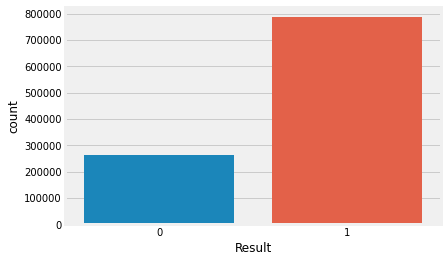

In [133]:
sns.countplot(datacopy['Result'])

In [134]:
X = datacopy.drop(['Result'], axis = 1)

y = datacopy['Result']

In [135]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1210)

In [136]:
X_train.head()

Area_Service  Hospital_County  ...  Payment_Typology  anomaly
88345              0                0  ...                 2        1
413923             0                0  ...                 1        1
609692             1                0  ...                 1        1
600531             1                1  ...                 2        1
547844             1                1  ...                 3        1

[5 rows x 24 columns]

In [137]:
gc.collect()

2894

In [138]:
def score(model, test = X_test, y_true = y_test):
    
    pred = model.predict(test)

    print('Average precision-recall score RF:\t', round(average_precision_score(y_true, pred),4)*100)
    print()
    print("Cohen's Kappa Score:\t",round(cohen_kappa_score(y_true,pred),4)*100)
    print()
    print("R-Squared Score:\t",round(r2_score(y_true,pred),4)*100)
    print()
    print("Area Under ROC Curve:\t",round(roc_auc_score(y_true,pred),4)*100)
    print()
    print(classification_report(y_true,pred))
    
    
    precision, recall, _ = precision_recall_curve(y_true, pred)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_score(y_true, pred)))
    
    
    
    fpr_rf, tpr_rf, _ = roc_curve(y_true, pred)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.step(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    #plt.fill_between(fpr_rf, tpr_rf, step='post', alpha=0.2, color='b')


    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [139]:
def plot_2d_space(X, y, label='Results'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    plt.figure(figsize=(12, 9), dpi=80)
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y==l, 0], X[y==l, 1], c=c, label=l, marker=m)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


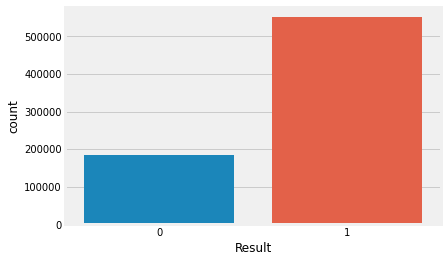

In [140]:
sns.countplot(y_train)

In [141]:
pip install pydotplus

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from numpy import inf

%matplotlib inline

In [143]:
print(datacopy['Result'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((datacopy[datacopy['Result'] == 0].shape[0] / datacopy.shape[0])))

1    786407
0    262168
Name: Result, dtype: int64

Percentage of fraudulent activity: 25.00%


In [144]:
def clean_dataset(data):
  assertisinstance(data,pd.dataframe)
  data.dropna(inplace=True)
  indices_to_keep = ~data.isin([np.nan,np,inf,-np.inf]).any(1)
  return data[indices_to_keep.astype(np.float64)]

In [145]:
X = datacopy.drop('Result', axis=1)
y = datacopy['Result']

# train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    196755
0    196755
dtype: int64


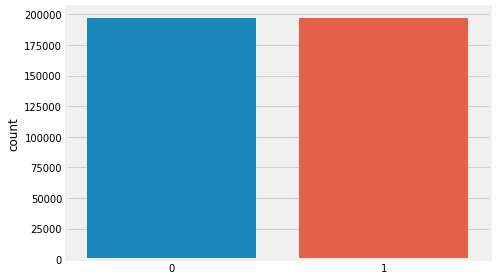

In [146]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# check the balanced data
print(pd.Series(y_rus).value_counts())

# plot the new distribution
fig, ax = plt.subplots(figsize=(7, 4))
ax = sns.countplot(y_rus)
plt.tight_layout()
plt.savefig('graph6.png')

# Feature Engineering

## PCA for Feature Selection

In [164]:
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [165]:
rep = datacopy.iloc[:,3:]
rep

Age  Gender  Cultural_group  ...  Result  Payment_Typology  anomaly
0          0       1               0  ...       1                 1        1
1          0       1               0  ...       1                 1        1
2          0       1               0  ...       1                 1        1
3          1       1               0  ...       0                 1        1
4          0       1               0  ...       1                 1        1
...      ...     ...             ...  ...     ...               ...      ...
1048570    0       1               0  ...       1                 3        1
1048571    1       1               0  ...       1                 3        1
1048572    0       0               0  ...       0                 3        1
1048573    0       1               1  ...       1                 3        1
1048574    0       0               0  ...       1                 2        1

[1048575 rows x 22 columns]

In [166]:
repnsur = rep.values 
repnsur

array([[0., 1., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 3., 1.],
       [0., 1., 1., ..., 1., 3., 1.],
       [0., 0., 0., ..., 1., 2., 1.]])

In [167]:
normalize = StandardScaler().fit_transform(repnsur) 
normalize

array([[-0.4  ,  0.876, -0.385, ...,  0.577, -1.212,  0.101],
       [-0.4  ,  0.876, -0.385, ...,  0.577, -1.212,  0.101],
       [-0.4  ,  0.876, -0.385, ...,  0.577, -1.212,  0.101],
       ...,
       [-0.4  , -1.142, -0.385, ..., -1.732,  1.379,  0.101],
       [-0.4  ,  0.876,  2.6  , ...,  0.577,  1.379,  0.101],
       [-0.4  , -1.142, -0.385, ...,  0.577,  0.083,  0.101]])

In [168]:
pca = PCA(n_components = 21)
pca_values = pca.fit_transform(normalize)
pca_values 

array([[-9.384e-01,  9.685e-02, -1.229e+00, ...,  8.296e-02, -1.429e+00,
         8.938e-01],
       [ 2.652e-01, -1.386e+00,  1.586e-01, ...,  6.737e-02, -2.914e-04,
         1.738e-01],
       [-8.869e-01, -7.034e-01, -4.659e-02, ..., -2.599e-01, -7.796e-02,
         1.118e-01],
       ...,
       [ 3.163e+00, -1.460e+00,  1.120e+00, ...,  3.379e-01, -1.401e-01,
         1.730e-01],
       [-2.179e-01, -2.614e-01, -9.737e-01, ..., -3.159e-01,  6.360e-02,
         1.486e-01],
       [-6.605e-01, -8.838e-01,  5.156e-01, ...,  1.255e-02,  2.605e-02,
         1.997e-01]])

In [169]:
pca.components_

array([[-2.156e-01, -3.908e-02,  2.247e-02,  3.746e-02,  4.005e-01,
        -5.854e-02, -1.409e-03, -8.995e-02, -2.394e-02, -7.605e-03,
         3.604e-01,  3.212e-01, -6.969e-02, -2.355e-01, -8.646e-03,
         1.736e-01,  4.266e-01,  4.039e-01,  4.316e-02, -4.622e-03,
         1.284e-01, -3.007e-01],
       [ 2.679e-01,  2.822e-02,  5.946e-03, -3.789e-02,  2.244e-01,
         3.136e-01,  1.418e-02,  1.224e-01,  1.738e-01, -3.979e-02,
        -2.356e-01, -2.698e-01, -2.476e-01,  2.643e-01, -4.871e-04,
        -4.587e-01,  2.617e-01,  2.936e-01,  1.292e-01, -8.756e-03,
        -1.308e-01, -2.683e-01],
       [ 4.673e-01, -1.734e-01,  5.846e-02, -9.130e-02,  1.458e-01,
        -5.033e-01,  2.198e-02,  8.732e-02, -7.869e-03,  1.784e-02,
         4.937e-02,  3.428e-02,  4.335e-01,  4.507e-01, -3.121e-02,
         1.728e-01,  6.817e-02,  5.466e-02,  2.093e-02, -3.451e-03,
        -2.846e-02, -1.495e-01],
       [-2.454e-01, -5.672e-02,  1.843e-01, -2.958e-02,  1.476e-01,
        -4.933e-0

In [170]:
var = pca.explained_variance_ratio_
var 

array([0.149, 0.108, 0.089, 0.059, 0.054, 0.051, 0.049, 0.047, 0.045,
       0.045, 0.044, 0.043, 0.041, 0.038, 0.033, 0.026, 0.022, 0.016,
       0.013, 0.013, 0.009])

In [171]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([14.87, 25.7 , 34.58, 40.53, 45.9 , 50.98, 55.92, 60.57, 65.12,
       69.64, 74.04, 78.31, 82.38, 86.19, 89.46, 92.06, 94.27, 95.86,
       97.2 , 98.46, 99.36])

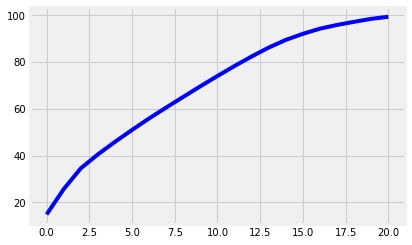

In [172]:
plt.plot(var1,color="blue")

In [173]:
 pca_values[:,12:21]

array([[ 9.405e-01,  1.016e-01, -2.144e-01, ...,  8.296e-02, -1.429e+00,
         8.938e-01],
       [ 9.581e-01, -1.512e-01, -7.098e-01, ...,  6.737e-02, -2.914e-04,
         1.738e-01],
       [ 1.086e+00,  3.598e-01,  4.406e-01, ..., -2.599e-01, -7.796e-02,
         1.118e-01],
       ...,
       [-1.418e+00,  1.856e-01, -1.200e+00, ...,  3.379e-01, -1.401e-01,
         1.730e-01],
       [-1.504e-01,  1.649e+00,  1.116e+00, ..., -3.159e-01,  6.360e-02,
         1.486e-01],
       [-7.553e-01,  1.389e+00,  9.722e-02, ...,  1.255e-02,  2.605e-02,
         1.997e-01]])

In [174]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,12:21],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9']), datacopy[['Area_Service']],datacopy[['Hospital_County']],datacopy[['Hospital_Id']]], axis = 1)
finalDf

pc1       pc2  ...  Hospital_County  Hospital_Id
0        0.940501  0.101590  ...                0         37.0
1        0.958080 -0.151190  ...                0         37.0
2        1.086325  0.359792  ...                0         37.0
3        1.237252  0.302439  ...                0         37.0
4        0.996922 -0.186543  ...                0         37.0
...           ...       ...  ...              ...          ...
1048570 -0.284273  0.440195  ...                0       1169.0
1048571  0.191804 -0.456566  ...                0       1169.0
1048572 -1.418333  0.185580  ...                0       1169.0
1048573 -0.150377  1.648709  ...                0       1169.0
1048574 -0.755326  1.389104  ...                0       1169.0

[1048575 rows x 12 columns]

In [175]:
finalDf[finalDf.duplicated()].shape 

(6030, 12)

In [176]:
finalDf[finalDf.duplicated()]

pc1       pc2  ...  Hospital_County  Hospital_Id
1125     0.447069 -0.261903  ...                0         39.0
3086     0.332720 -0.295589  ...                0         66.0
3226     1.509414 -0.563564  ...                0         66.0
4209     1.509414 -0.563564  ...                0         66.0
4234     1.427277 -0.615549  ...                0         66.0
...           ...       ...  ...              ...          ...
1015327  0.237110 -1.131068  ...                0       1168.0
1025529 -1.041764  0.306894  ...                0       1169.0
1028997 -0.805608  0.865646  ...                0       1169.0
1035973 -1.041764  0.306894  ...                0       1169.0
1043713 -0.819403  0.259153  ...                0       1169.0

[6030 rows x 12 columns]

In [177]:
mf=finalDf.drop_duplicates() 

In [178]:
mf.shape

(1042545, 12)

In [179]:
mf[mf.duplicated()].shape

(0, 12)

## Chi-square Feature Selection

In [180]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
# input 
X = datacopy.iloc[:,:-3] 

#output 
Y = datacopy.iloc[:, -3] 
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[2.273e-04 2.948e-01 1.083e+03 1.701e-01 9.920e-03 4.698e-01 3.435e-01
 1.423e+01 7.235e-01 1.595e+00 7.219e+01 7.709e-03 2.705e+00 2.712e-01
 1.563e+00 1.944e+00 2.208e+02 1.130e+01 9.092e-01 2.963e+05 1.661e+05
 5.853e-01]


### On performing Feature Engineering techniques, Its clear that Hospital_Id, Weight_baby, Tot_charge, Tot_cost are the columns that are contributing most to the model building.

# Model Building

## Decission Tree

In [181]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn import metrics

In [182]:
dtc = datacopy.drop(['apr_drg_description','Surg_Description','Abortion','Mortality_risk','ethnicity','Days_spend_hsptl'
                    ,'Admission_type','Emergencydept','Code_illness','Cultural_group','Gender','ccs_procedure_code','Home_or_self_care','Age'],axis=1)
dtc

Area_Service  Hospital_County  ...  Payment_Typology  anomaly
0                   0                0  ...                 1        1
1                   0                0  ...                 1        1
2                   0                0  ...                 1        1
3                   0                0  ...                 1        1
4                   0                0  ...                 1        1
...               ...              ...  ...               ...      ...
1048570             0                0  ...                 3        1
1048571             0                0  ...                 3        1
1048572             0                0  ...                 3        1
1048573             0                0  ...                 3        1
1048574             0                0  ...                 2        1

[1048575 rows x 11 columns]

In [183]:
x = dtc.iloc[:,0:8]
x 

Area_Service  ...  ratio_of_total_costs_to_total_charges
0                   0  ...                               1.012798
1                   0  ...                               1.079365
2                   0  ...                               1.059379
3                   0  ...                               1.484167
4                   0  ...                               0.986161
...               ...  ...                                    ...
1048570             0  ...                               0.199522
1048571             0  ...                               0.288382
1048572             0  ...                               0.236516
1048573             0  ...                               0.245846
1048574             0  ...                               0.200331

[1048575 rows x 8 columns]

In [184]:
y = dtc.iloc[:,8]
y 

0          1
1          1
2          1
3          0
4          1
          ..
1048570    1
1048571    1
1048572    0
1048573    1
1048574    1
Name: Result, Length: 1048575, dtype: int64

In [185]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.25,random_state=40) 

In [186]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

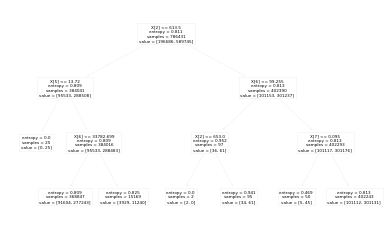

In [187]:
tree.plot_tree(model);

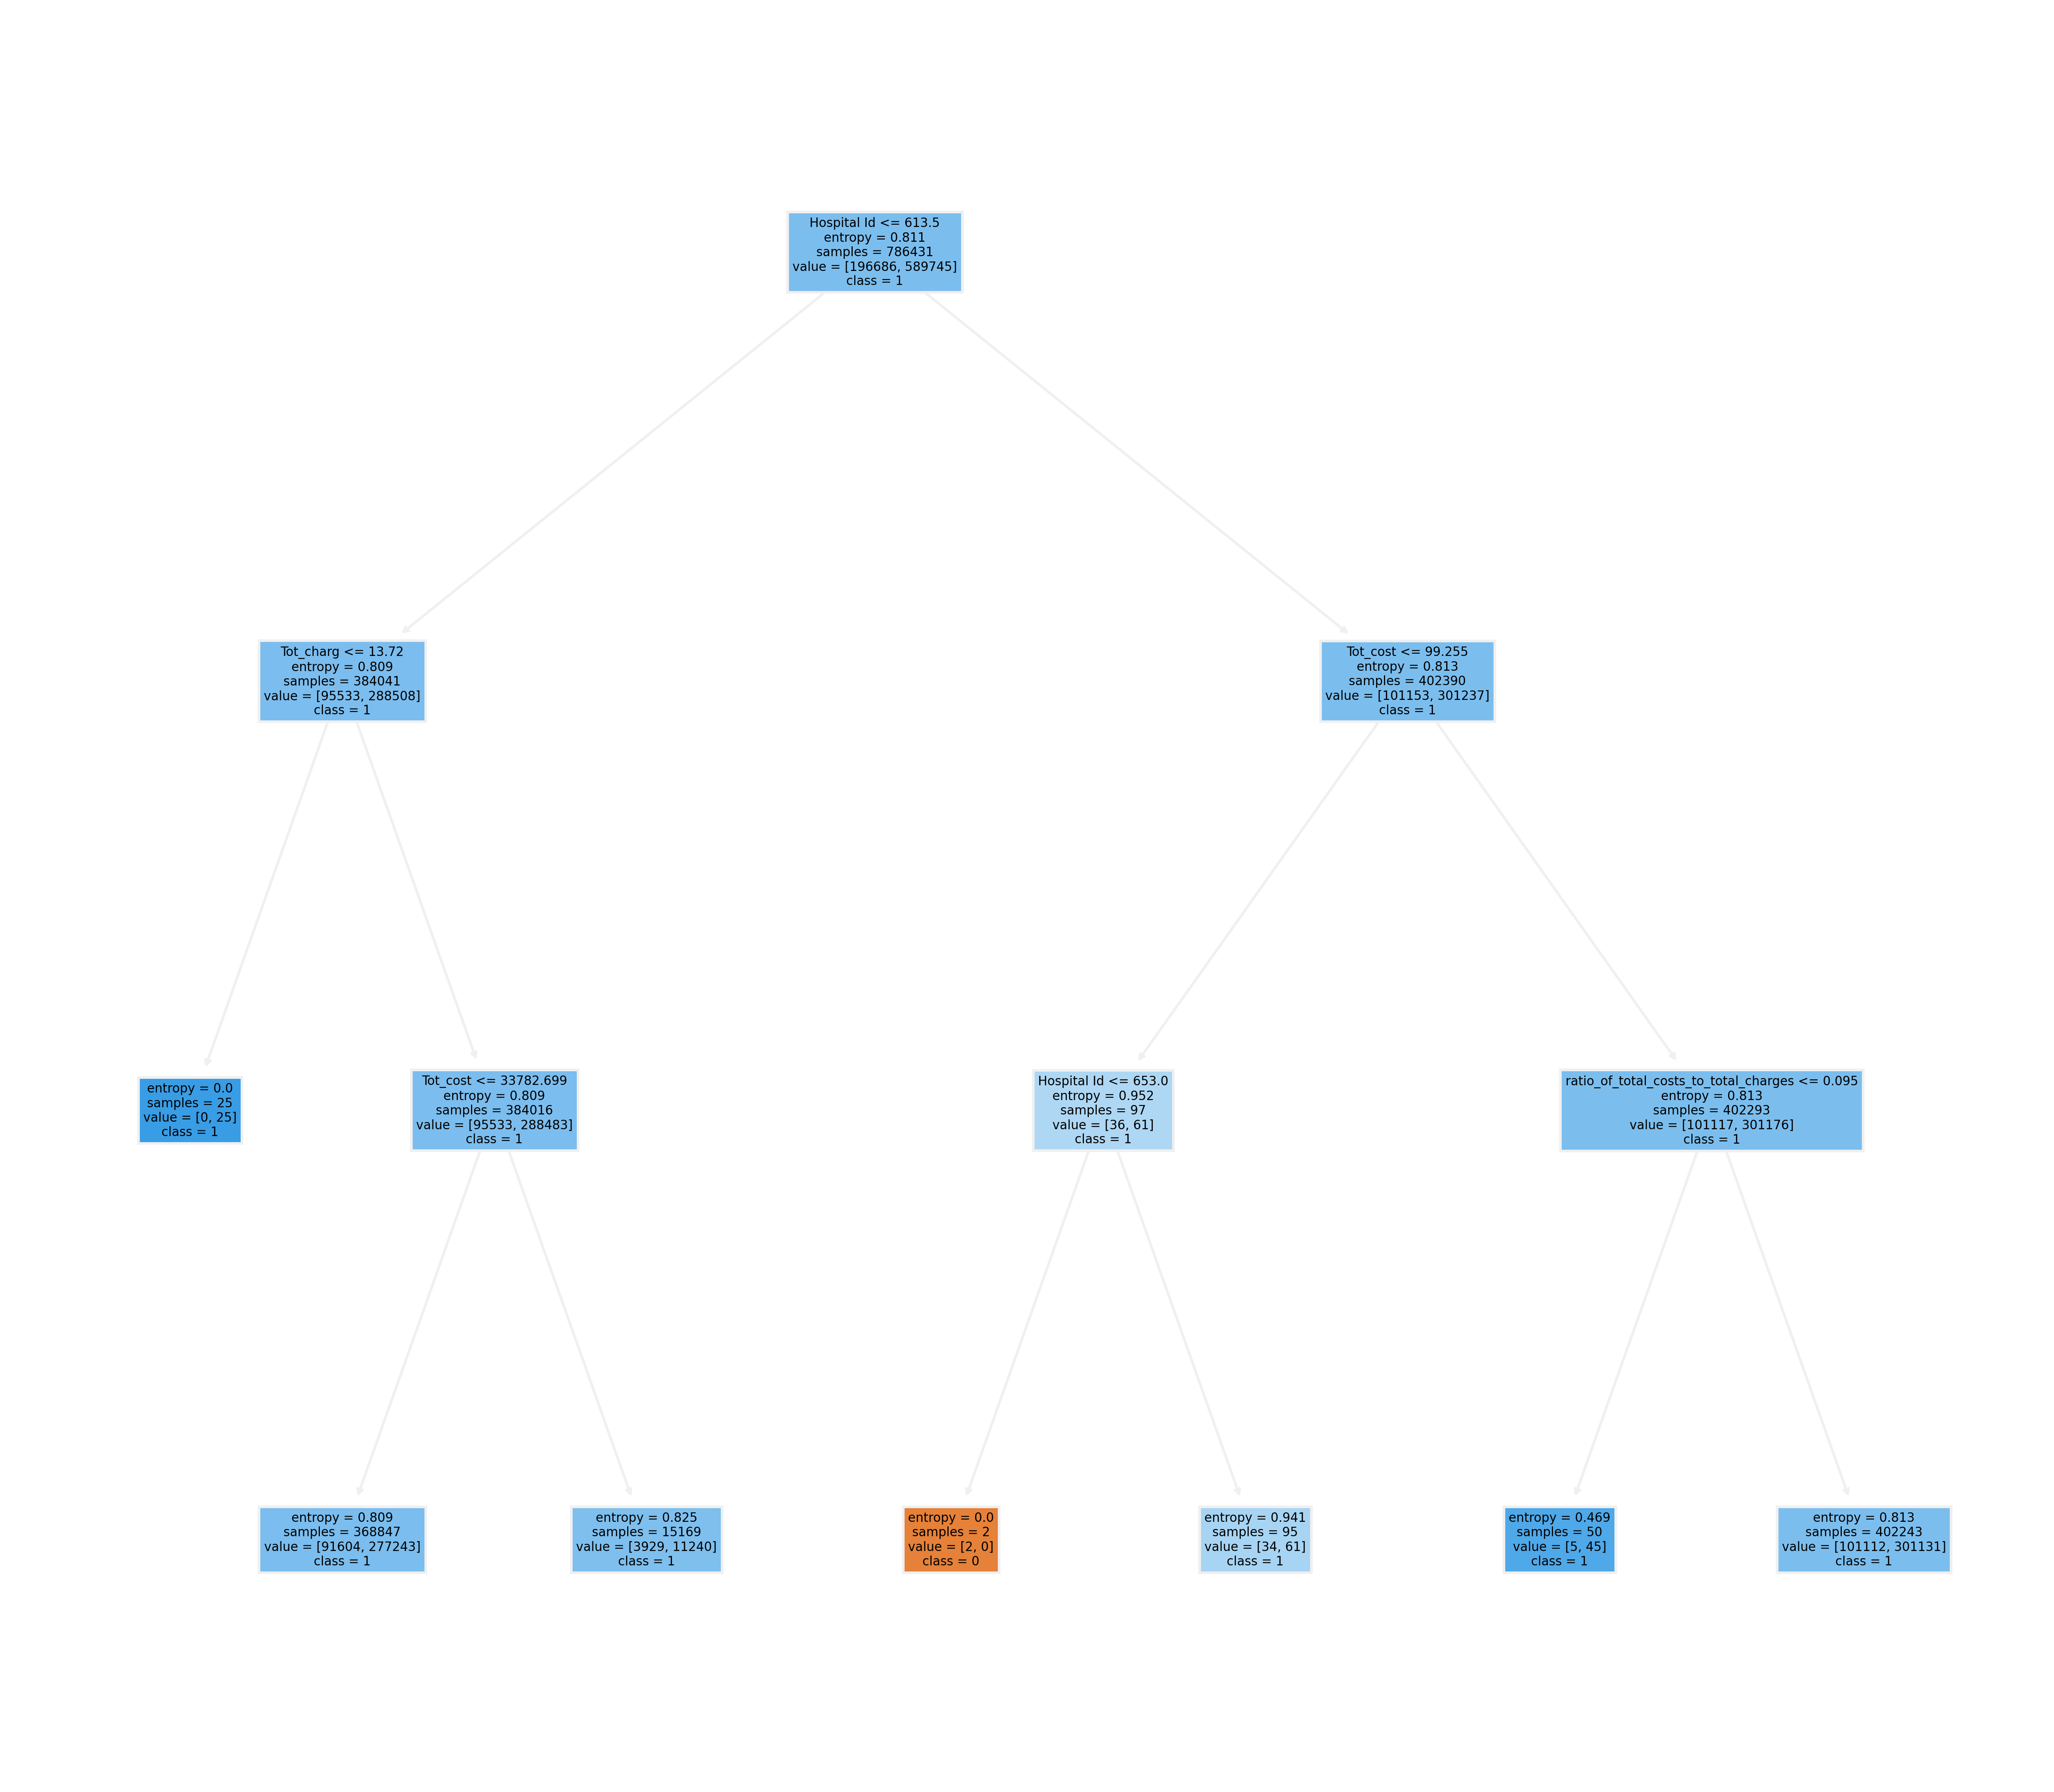

In [188]:
fn=['Area_Service','Hospital County','Hospital Id','ccs_diagnosis_code','Weight_baby','Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

TypeError: ignored

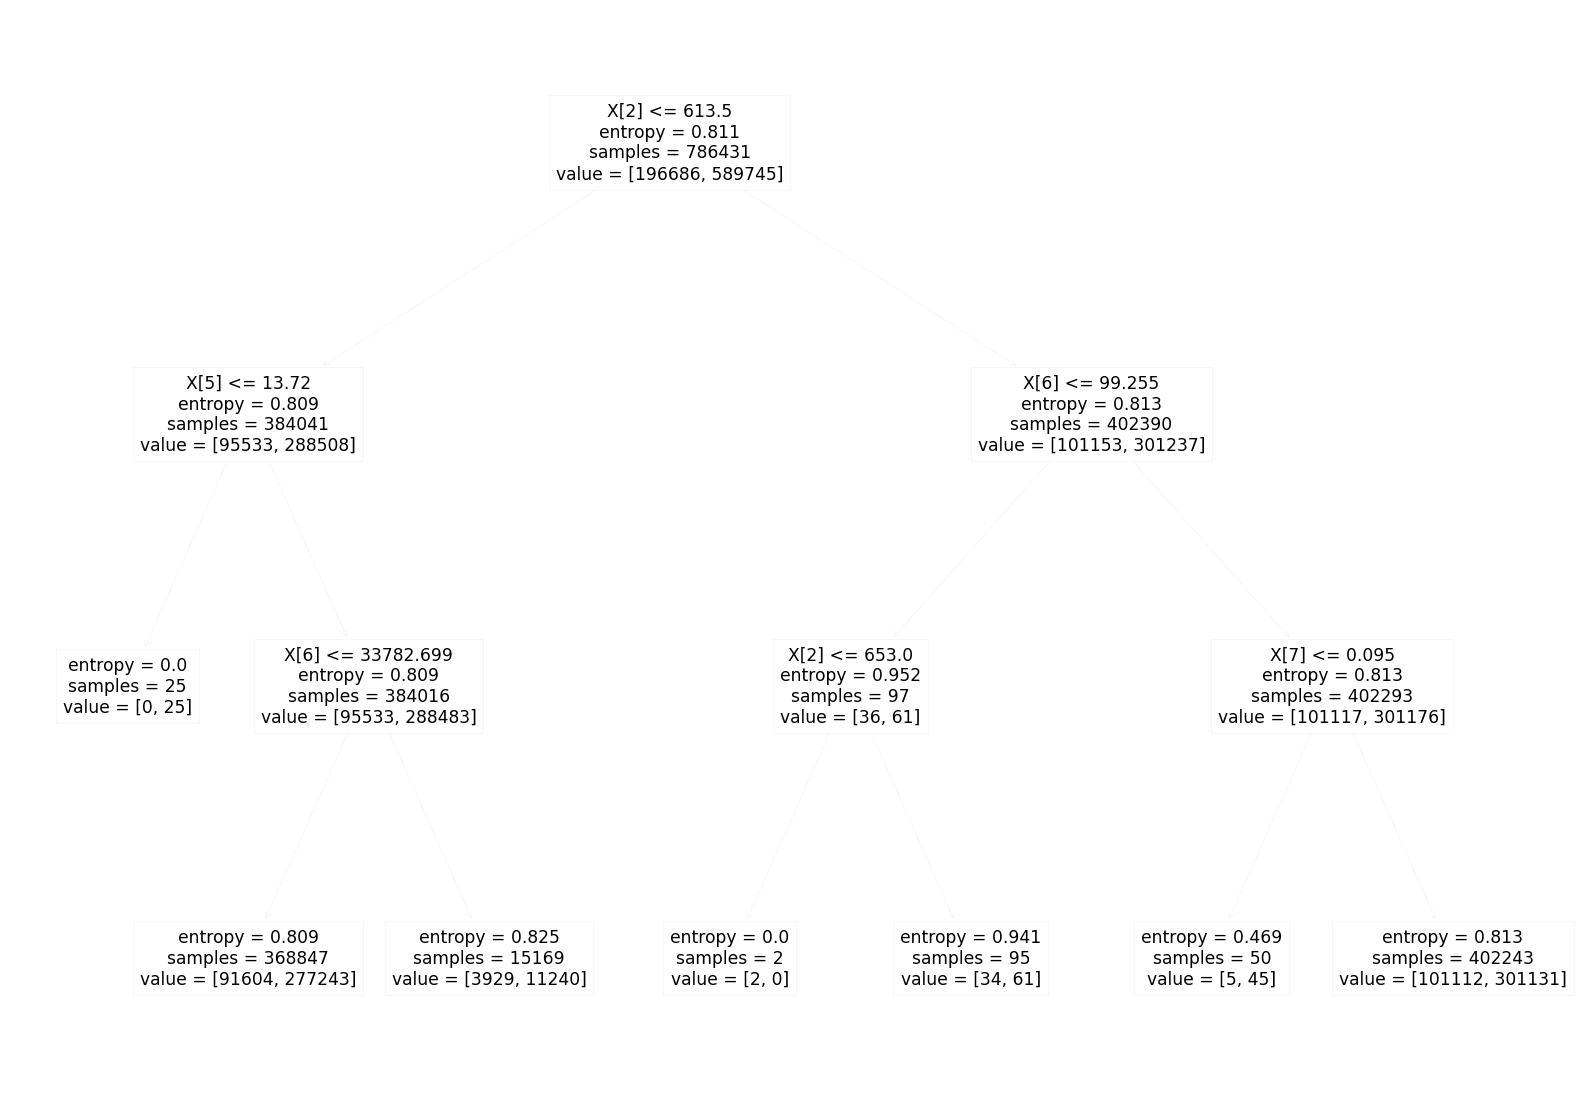

In [189]:
fig = plt.figure(figsize=(25,20))
         tree.plot_tree(model)(model, 
                   feature_names=['Area_Service','Hospital County','Hospital Id','ccs_diagnosis_code','Weight_baby','Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges'],  
                   class_names=y,
                   filled=True)
fig.savefig("decistion_tree.png")

In [190]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [191]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6189384460449219


In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [198]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

x=dtc.iloc[:,0:8]
y=dtc.iloc[:,8]
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6159130320047814


In [200]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=dtc.iloc[:,0:8]
y=dtc.iloc[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=0)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6159130320047814


In [201]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [202]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [203]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [204]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.05%


In [206]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

x=dtc.iloc[:,0:8]
y=dtc.iloc[:,8]
seed = 7

kfold = KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(rf.estimators_[0], x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6159130320047814
